# Read in WD spectrum

<IPython.core.display.Javascript object>


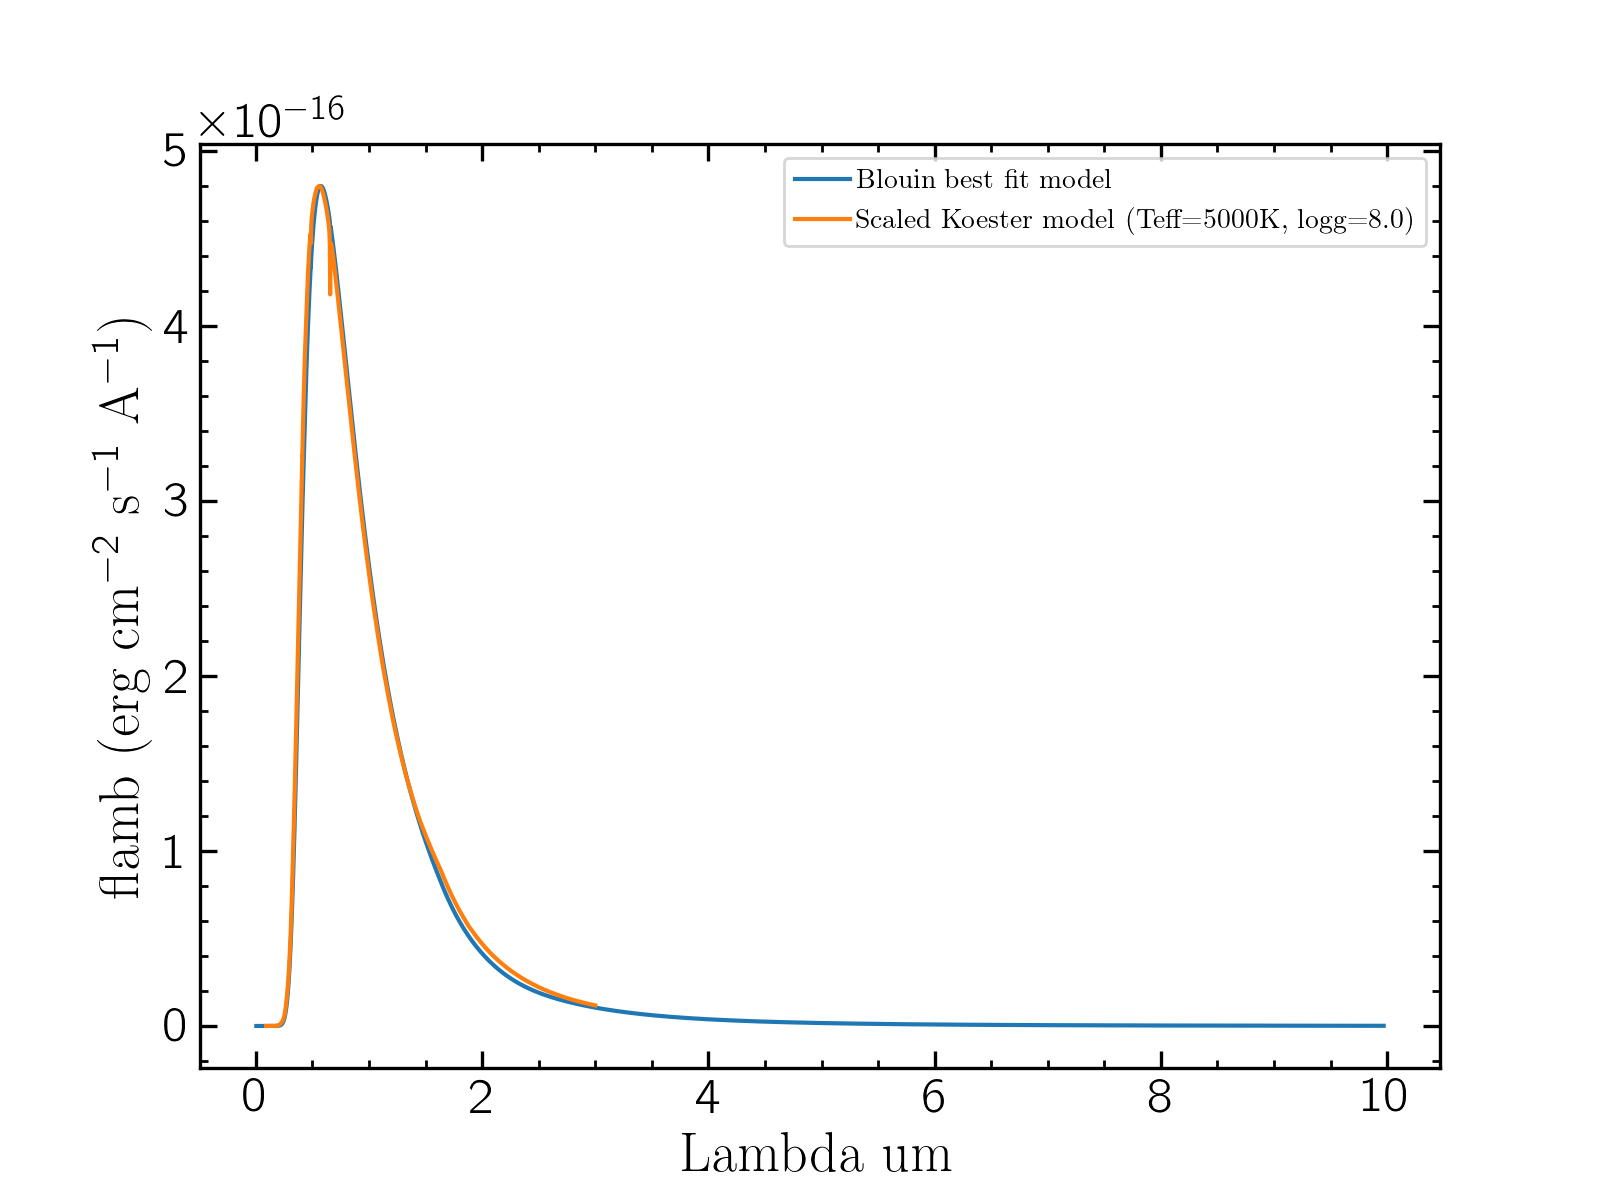

In [2]:
p = pd.read_table('bestfit-JWST-fnu.txt',comment='#',delim_whitespace=True,
                 names=['lambda (um)','fnu (uJy)'])

k = pd.read_table('../model_spectra/Koester-WD/Koester-WD-atm//da05000_800.dk.dat.txt', comment='#',
                 delim_whitespace=True, names=['WAVELENGTH (ANGSTROM)', 'FLUX (ERG/CM2/S/A)'])

from myastrotools.tools import FnuToFlamb
p['flamb (erg/cm^2/s/A)'] = FnuToFlamb(np.array(p['fnu (uJy)'])*u.uJy,np.array(p['lambda (um)'])*u.um,
                                     returnvalueonly = True)

scalefactor = np.max(p['flamb (erg/cm^2/s/A)'])/np.max(k['FLUX (ERG/CM2/S/A)'])

%matplotlib notebook
#plt.plot(p['lambda (um)'],p['fnu (uJy)'])
plt.plot(p['lambda (um)'],(p['flamb (erg/cm^2/s/A)']), label='Blouin best fit model')
plt.plot(k['WAVELENGTH (ANGSTROM)']*u.AA.to(u.um),k['FLUX (ERG/CM2/S/A)']*scalefactor,
        label='Scaled Koester model (Teff=5000K, logg=8.0)')
#plt.plot(k['WAVELENGTH (ANGSTROM)']*u.AA.to(u.um),k['FLUX (ERG/CM2/S/A)'])
plt.xlabel('Lambda um')
#plt.ylabel('fnu (uJy)')
plt.ylabel(r'flamb (erg cm$^{-2}$ s$^{-1}$ A$^{-1}$)')
plt.legend()

<IPython.core.display.Javascript object>


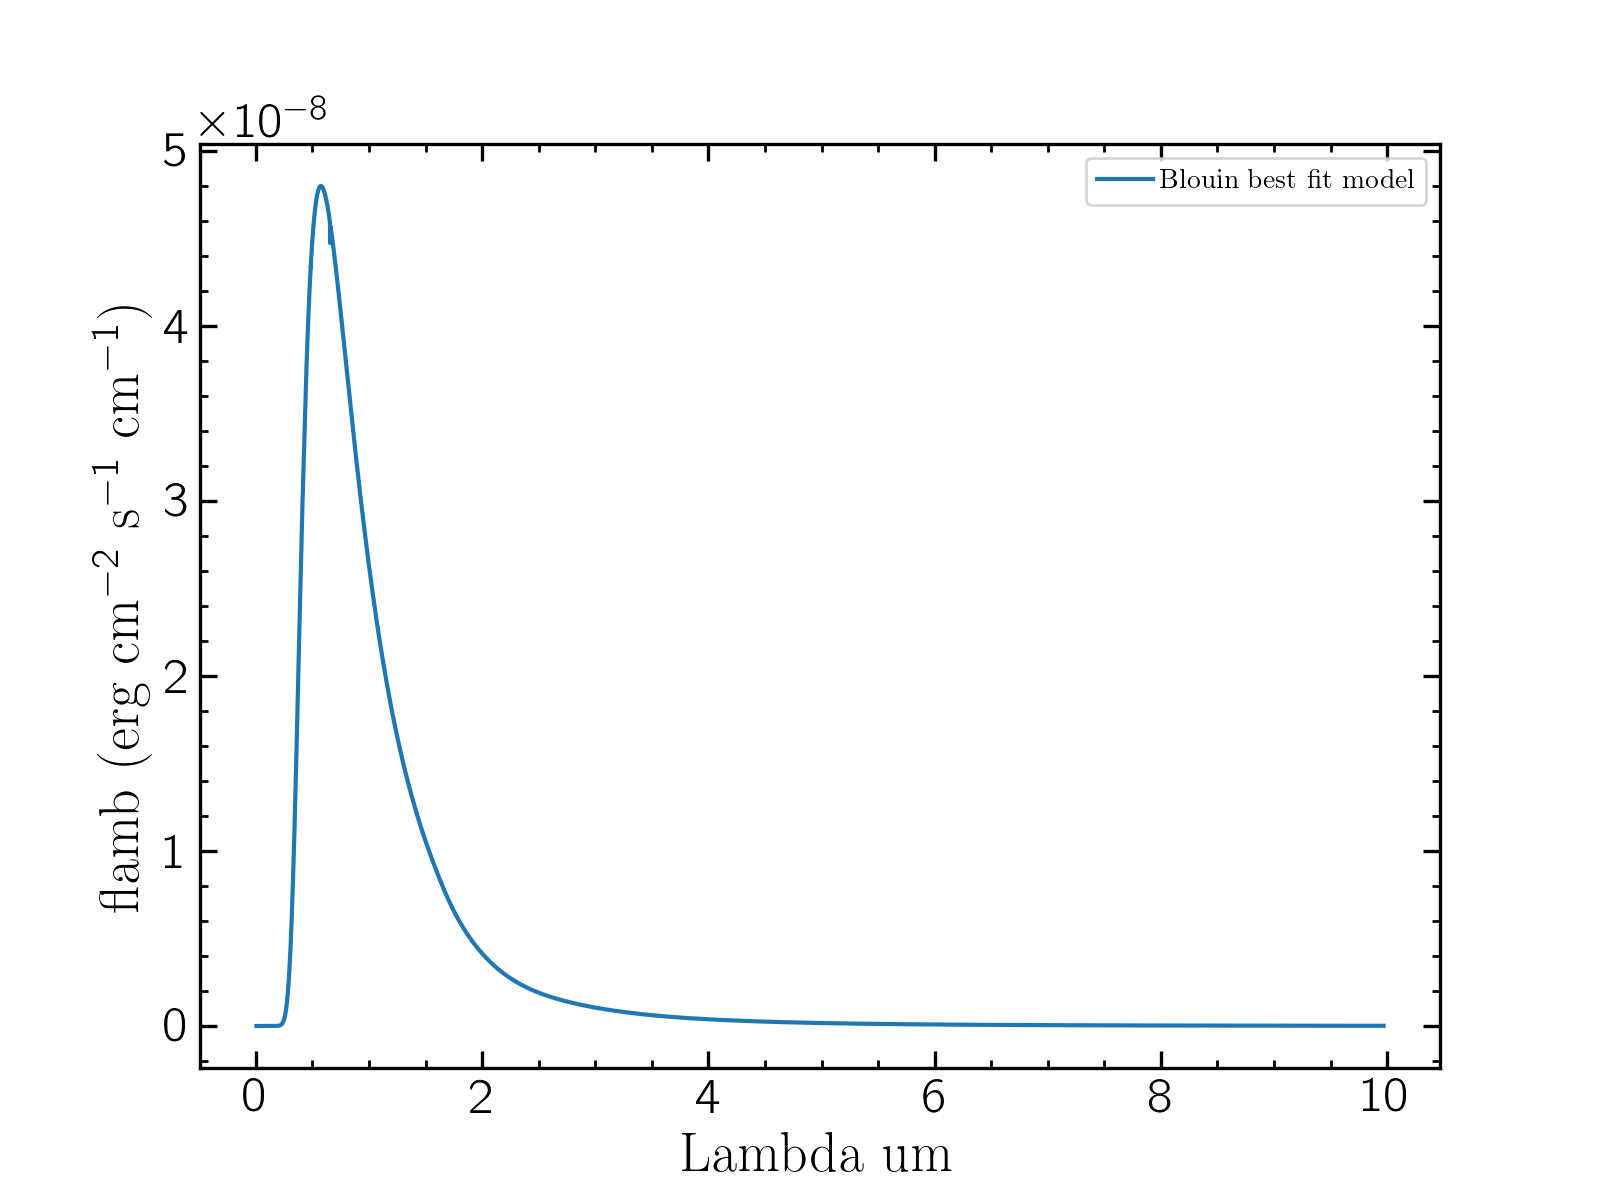

In [3]:
p['flamb (erg/cm^2/s/cm)'] = (np.array(p['flamb (erg/cm^2/s/A)'])*(1/u.AA)).to(1/u.cm)


%matplotlib notebook
#plt.plot(p['lambda (um)'],p['fnu (uJy)'])
plt.plot(p['lambda (um)'],(p['flamb (erg/cm^2/s/cm)']), label='Blouin best fit model')
plt.xlabel('Lambda um')
#plt.ylabel('fnu (uJy)')
plt.ylabel(r'flamb (erg cm$^{-2}$ s$^{-1}$ cm$^{-1}$)')
plt.legend()

In [4]:
l = []
for i in range(len(p)):
    l.append(p['flamb (erg/cm^2/s/cm)'][i].value)
p['flamb (erg/cm^2/s/cm)'] = l
p

,lambda (um),fnu (uJy),flamb (erg/cm^2/s/A),flamb (erg/cm^2/s/cm)
0,0.004000,2.734710e-93,5.124034e-107,5.124034e-99
1,0.004040,2.654280e-93,4.875338e-107,4.875338e-99
2,0.004080,2.576980e-93,4.640998e-107,4.640998e-99
3,0.004121,2.500820e-93,4.414667e-107,4.414667e-99
4,0.004162,2.427650e-93,4.201483e-107,4.201483e-99
...,...,...,...,...
22031,9.676000,4.259590e+01,1.363945e-19,1.363945e-11
22032,9.724380,4.219540e+01,1.337710e-19,1.337710e-11
22033,9.772760,4.180020e+01,1.312093e-19,1.312093e-11
22034,9.870490,4.101870e+01,1.262191e-19,1.262191e-11


In [12]:
filename = 'bestfit-JWST-fnu.txt'

p['fnu (Jy)'] = p['fnu (uJy)']*1e-6
pout = pd.DataFrame(data={'lambda (um)':p['lambda (um)'],
                         'fnu (Jy)':p['fnu (Jy)']})
pout.to_csv('bestfit-JWST-fnu-Jy-um.txt', header=None, index=False, sep=' ')
pout = pd.DataFrame(data={'lambda (um)':p['lambda (um)'],
                         'flam (erg/cm^2/s/A)':p['flamb (erg/cm^2/s/A)']})
pout.to_csv('bestfit-JWST-flam-Ang-um-forpicaso.txt', header=None, index=False, sep=' ')
pout.to_csv('bestfit-JWST-flam-Ang-um.txt',index=False)

p.to_csv('bestfit-JWST-flamb-Jy-um.txt', index=False)
pout

,lambda (um),flam (erg/cm^2/s/A)
0,0.004000,5.124034e-107
1,0.004040,4.875338e-107
2,0.004080,4.640998e-107
3,0.004121,4.414667e-107
4,0.004162,4.201483e-107
...,...,...
22031,9.676000,1.363945e-19
22032,9.724380,1.337710e-19
22033,9.772760,1.312093e-19
22034,9.870490,1.262191e-19


In [18]:
import picaso.justdoit as jdi
opa = jdi.opannection(wave_range=[0.3,2])

In [6]:
min_temp = min(opa.temps)
min_temp, min_temp-min_temp*0.3

(75.0, 52.5)

<IPython.core.display.Javascript object>


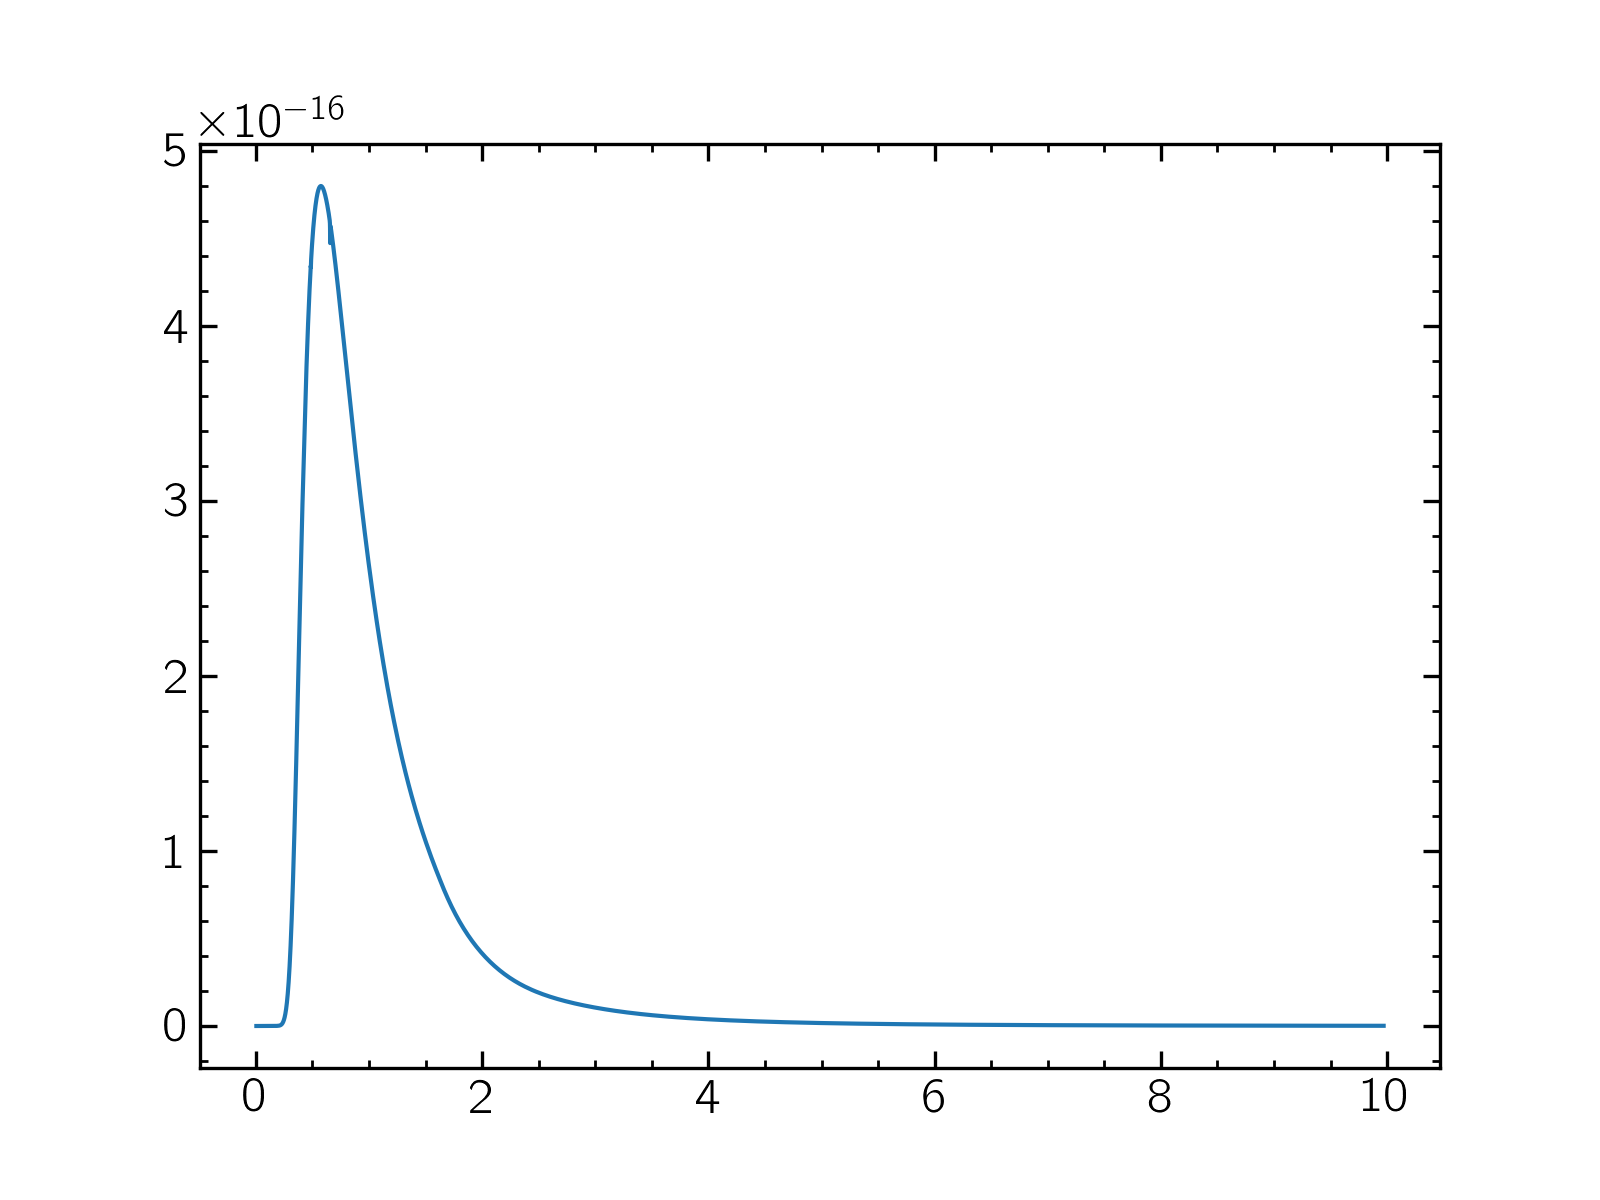

In [7]:
filename = 'bestfit-JWST-flam-Ang-um.txt'
star = np.genfromtxt(filename, dtype=(float, float), names='w, f')

flux = star['f']
wave = star['w']
#sort if not in ascending order 
sort = np.array([wave,flux]).T
sort= sort[sort[:,0].argsort()]
wave = sort[:,0]
flux = sort[:,1] 

import pysynphot as psyn
sp = psyn.ArraySpectrum(wave, flux, waveunits='um', fluxunits='FLAM') 
sp.convert("um")
sp.convert('flam') #ergs/cm2/s/ang
sp.sample(1.5)

%matplotlib notebook
plt.plot(sp.wave,sp.flux)

#### trying a blackbody?

In [9]:
import pysynphot as S
bb = S.BlackBody(5000)
bb.convert("um")
bb.convert('flam') #ergs/cm2/s/ang

# %matplotlib notebook
# plt.plot(bb.wave,bb.flux)
# #plt.plot(sp.wave,sp.flux)
# plt.xlabel(bb.waveunits)
# plt.ylabel(bb.fluxunits)

filename = 'blackbody-flam-um.txt'

pout = pd.DataFrame(data={'wave':bb.wave,
                         'flux':bb.flux})
pout.to_csv(filename, header=None, index=False, sep=' ')

In [10]:
##### Load kcoeff opacities:
planet_mh_str = '+100'#'+1.0' #log metallicity
planet_mh = float(planet_mh_str[1:])/100
planet_mh_CtoO_str = '100'#'1.0' # CtoO ratio

ck_db = f'/Volumes/Oy/picaso/reference/kcoeff_2020/sonora_2020_feh{planet_mh_str}_co_{planet_mh_CtoO_str}.data.196'
opacity_ck = jdi.opannection(ck_db=ck_db, wave_range = [0.4,10]) # grab your opacities

<IPython.core.display.Javascript object>


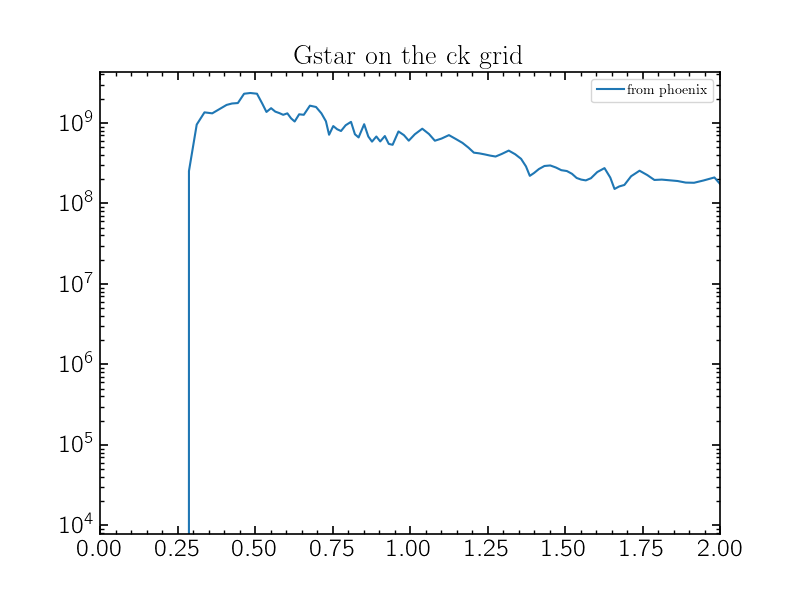

Text(0.5, 1.0, 'Gstar on the ck grid')

In [11]:
import picaso.justdoit as jdi
import picaso.justplotit as jpi


#opacity = jdi.opannection()
wd = jdi.inputs(calculation="planet", climate = True) # start a calculation
wd.phase_angle(0)

# wd.star(opacity_ck, temp=4920, metal=None, logg=8.05 ,radius = 0.0121, radius_unit=u.Rsun,
#         semi_major=0.0204, semi_major_unit = u.au, filename=filename, w_unit='um', f_unit='Jy')

# pysynphot FLAM units are ergs/cm2/s/Ang https://pysynphot.readthedocs.io/en/latest/units.html
wd.star(opacity_ck, temp=None, metal=None, logg=None ,radius = 0.0121, radius_unit=u.Rsun,
         semi_major=0.0204, semi_major_unit = u.au, filename=filename, w_unit='um', f_unit='FLAM')

Gstar = jdi.inputs(calculation="planet", climate = True) # start a calculation
Gstar.phase_angle(0)

Gstar.star(opacity_ck, temp=6000, metal=0, logg=5 ,radius = 1, radius_unit=u.Rsun,
        semi_major=0.0204, semi_major_unit = u.au, database='phoenix')

%matplotlib notebook
plt.plot(1e4/Gstar.inputs['star']['wno'], Gstar.inputs['star']['flux'], label='from phoenix')
plt.gca().set_yscale('log')
plt.xlim(0,2)
plt.legend()
plt.title('Gstar on the ck grid')

In [8]:
filename = 'bestfit-JWST-flam-Ang-um.txt'
#filename = 'blackbody-flam-um.txt'

import picaso.justdoit as jdi
import picaso.justplotit as jpi

##### Load kcoeff opacities:
planet_mh_str = '+100'#'+1.0' #log metallicity
planet_mh = float(planet_mh_str[1:])/100
planet_mh_CtoO_str = '100'#'1.0' # CtoO ratio

ck_db = f'/Volumes/Oy/picaso/reference/kcoeff_2020/sonora_2020_feh{planet_mh_str}_co_{planet_mh_CtoO_str}.data.196'
opacity_ck = jdi.opannection(ck_db=ck_db) # grab your opacities
#opacity = jdi.opannection()
wd = jdi.inputs(calculation="planet", climate = True) # start a calculation
wd.phase_angle(0)

# wd.star(opacity_ck, temp=4920, metal=None, logg=8.05 ,radius = 0.0121, radius_unit=u.Rsun,
#         semi_major=0.0204, semi_major_unit = u.au, filename=filename, w_unit='um', f_unit='Jy')

# pysynphot FLAM units are ergs/cm2/s/Ang https://pysynphot.readthedocs.io/en/latest/units.html
wd.star(opacity_ck, temp=None, metal=None, logg=None ,radius = 0.0121, radius_unit=u.Rsun,
         semi_major=0.0204, semi_major_unit = u.au, filename=filename, w_unit='um', f_unit='FLAM')
################################

filename = 'blackbody-flam-um.txt'

import picaso.justdoit as jdi
import picaso.justplotit as jpi

##### Load kcoeff opacities:
planet_mh_str = '+100'#'+1.0' #log metallicity
planet_mh = float(planet_mh_str[1:])/100
planet_mh_CtoO_str = '100'#'1.0' # CtoO ratio

ck_db = f'/Volumes/Oy/picaso/reference/kcoeff_2020/sonora_2020_feh{planet_mh_str}_co_{planet_mh_CtoO_str}.data.196'
opacity_ck = jdi.opannection(ck_db=ck_db) # grab your opacities
#opacity = jdi.opannection()
bb = jdi.inputs(calculation="planet", climate = True) # start a calculation
bb.phase_angle(0)

# wd.star(opacity_ck, temp=4920, metal=None, logg=8.05 ,radius = 0.0121, radius_unit=u.Rsun,
#         semi_major=0.0204, semi_major_unit = u.au, filename=filename, w_unit='um', f_unit='Jy')

# pysynphot FLAM units are ergs/cm2/s/Ang https://pysynphot.readthedocs.io/en/latest/units.html
bb.star(opacity_ck, temp=None, metal=None, logg=None ,radius = 0.0121, radius_unit=u.Rsun,
         semi_major=0.0204, semi_major_unit = u.au, filename=filename, w_unit='um', f_unit='FLAM')
# wd.setup_nostar()
# wd.inputs['star']['database'] = 'ck04models'
# wd.inputs['star']['temp'] = 4920 #K, from Simon's fit
# wd.inputs['star']['logg'] = 8.05 # from Simon's fit
# wd.inputs['star']['metal'] = 'nostar'
# wd.inputs['star']['radius'] = 0.0121 # from Simon's fit
# wd.inputs['star']['radius_unit'] = u.Rsun
# wd.inputs['star']['mass'] = 0.599 # from Simon's fit
# wd.inputs['star']['mass_unit'] = u.Msun
# wd.inputs['star']['flux'] = p['flamb (erg/cm^2/s/cm)'] 
# wd.inputs['star']['wno'] = 1e4/p['lambda (um)']
# wd.inputs['star']['semi_major'] = 0.0204 # From Andrew's paper
# wd.inputs['star']['semi_major_unit'] = u.au 
#wd.inputs['star']['f_unit'] = 'FLAM'
#wd.inputs['star']['w_unit'] = 'um'

%matplotlib notebook
plt.plot(wd.inputs['star']['wno'], wd.inputs['star']['flux'], label='wd')
plt.plot(bb.inputs['star']['wno'], bb.inputs['star']['flux'], label='bb')
#plt.plot(p['lambda (um)'],(p['flamb (erg/cm^2/s/A)']), label='Blouin best fit model')
#plt.gca().set_yscale('log')
#plt.xlim(0,15)
plt.legend()
plt.xlabel('wno')
plt.title('wd and bb on the ck grid')

AttributeError: module 'numpy' has no attribute 'float'

## That's not right
# Update after talking with natasha: actually it is.

### looking at the grids of the opacities

In [16]:
##### Load kcoeff opacities:
planet_mh_str = '+100'#'+1.0' #log metallicity
planet_mh = float(planet_mh_str[1:])/100
planet_mh_CtoO_str = '100'#'1.0' # CtoO ratio

ck_db = f'/Volumes/Oy/picaso/reference/kcoeff_2020/sonora_2020_feh{planet_mh_str}_co_{planet_mh_CtoO_str}.data.196'

opacity_ck = jdi.opannection(ck_db=ck_db)
opa = jdi.opannection()
wno_planet = opa.wno
wno_planet_ck = opacity_ck.wno
len(wno_planet),len(wno_planet_ck)




filename = 'bestfit-JWST-flam-Ang.txt'
star = np.genfromtxt(filename, dtype=(float, float), names='w, f')

flux = star['f']
wave = star['w']

import pysynphot as psyn
sp = psyn.ArraySpectrum(wave, flux, waveunits='um', fluxunits='FLAM')
sp.convert("um")
sp.convert('flam') #ergs/cm2/s/ang
wno_star = 1e4/sp.wave[::-1] #convert to wave number and flip
flux_star = sp.flux[::-1]*1e8 #flip and convert to ergs/cm3/s here to get correct order 

<IPython.core.display.Javascript object>


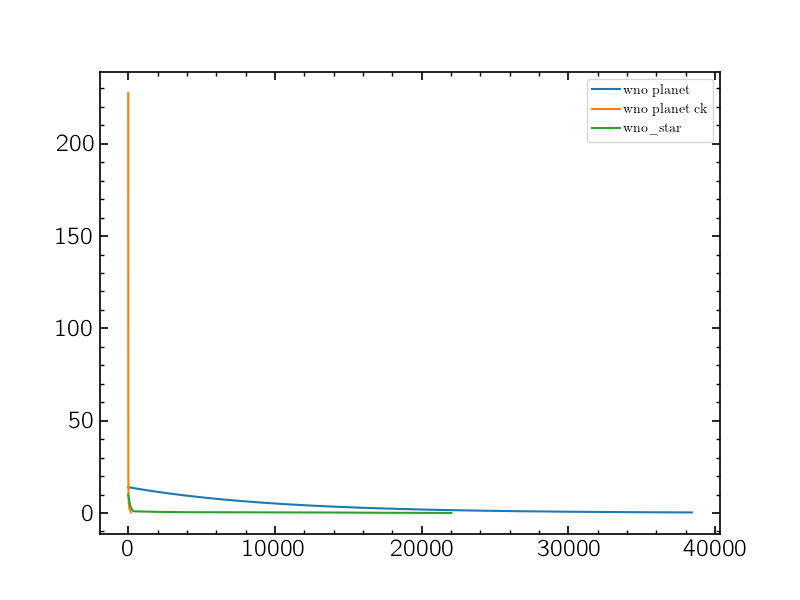

In [18]:
%matplotlib notebook
plt.plot(range(len(wno_planet)),1e4/wno_planet,label='wno planet')
plt.plot(range(len(wno_planet_ck)),1e4/wno_planet_ck,label='wno planet ck')
plt.plot(range(len(wno_star)),1e4/wno_star,label='wno_star')
plt.legend()

In [19]:
filename = 'bestfit-JWST-flam-Ang.txt'
star = np.genfromtxt(filename, dtype=(float, float), names='w, f')

flux = star['f']
wave = star['w']

import pysynphot as psyn
sp = psyn.ArraySpectrum(wave, flux, waveunits='um', fluxunits='FLAM')
sp.convert("um")
sp.convert('flam') #ergs/cm2/s/ang
wno_star = 1e4/sp.wave[::-1] #convert to wave number and flip
flux_star = sp.flux[::-1]*1e8 #flip and convert to ergs/cm3/s here to get correct order





ks = []
js = []

fine_flux_star = np.zeros(len(wno_planet))

for j in range(len(wno_planet)-1):
#for j in range(10-1):
    fl = 0

    for k in range(1,len(wno_star)):
    #for k in range(1,5):
#         print('j',j,'k',k)
#         print('wno_star[k]',wno_star[k], 'wno_planet[j]',wno_planet[j])
#         print('wno_star[k] > wno_planet[j]',wno_star[k] > wno_planet[j])
#         print('wno_star[k] < wno_planet[j+1]',wno_star[k] < wno_planet[j+1])
        if  (wno_star[k] > wno_planet[j]) and (wno_star[k] < wno_planet[j+1]):
            print('j',j,'k',k,'yes')
            print('wno_star[k] > wno_planet[j]',wno_star[k] > wno_planet[j])
            print('wno_star[k] < wno_planet[j+1]',wno_star[k] < wno_planet[j+1])
            print()
            ks.append(k)
            js.append(j)
            fl+= 0.5*(flux_star[k-1] +flux_star[k])*abs((1.0/wno_star[k])-(1.0/wno_star[k-1]))
    fine_flux_star[j] = fl

j 3495 k 1 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 3594 k 2 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 3644 k 3 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 3694 k 4 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 3743 k 5 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 3793 k 6 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 3893 k 7 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 3992 k 8 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 4092 k 9 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 4141 k 10 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 4191 k 11 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 4241 k 12 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[

j 9465 k 98 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 9514 k 99 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 9564 k 100 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 9664 k 101 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 9763 k 102 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 9813 k 103 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 9863 k 104 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 9962 k 105 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 10062 k 106 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 10111 k 107 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 10161 k 108 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 10261 k 109 yes
wno_star[k] > wno_planet[j] True
wn

j 16082 k 193 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 16131 k 194 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 16181 k 195 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 16231 k 196 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 16281 k 197 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 16331 k 198 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 16430 k 199 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 16480 k 200 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 16530 k 201 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 16579 k 202 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 16629 k 203 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 16729 k 204 yes
wno_star[k] > wno_planet[

j 22151 k 288 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 22201 k 289 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 22301 k 290 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 22400 k 291 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 22500 k 292 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 22599 k 293 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 22620 k 294 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 22620 k 295 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 22699 k 296 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 22798 k 297 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 22898 k 298 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 22947 k 299 yes
wno_star[k] > wno_planet[

j 27265 k 383 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 27267 k 384 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 27270 k 385 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 27272 k 386 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 27274 k 387 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 27277 k 388 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 27279 k 389 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 27281 k 390 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 27283 k 391 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 27286 k 392 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 27288 k 393 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 27290 k 394 yes
wno_star[k] > wno_planet[

j 27493 k 482 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 27495 k 483 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 27498 k 484 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 27500 k 485 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 27502 k 486 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 27505 k 487 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 27507 k 488 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 27509 k 489 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 27511 k 490 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 27514 k 491 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 27516 k 492 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 27518 k 493 yes
wno_star[k] > wno_planet[

j 27728 k 584 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 27730 k 585 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 27732 k 586 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 27735 k 587 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 27737 k 588 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 27739 k 589 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 27742 k 590 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 27744 k 591 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 27746 k 592 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 27749 k 593 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 27751 k 594 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 27753 k 595 yes
wno_star[k] > wno_planet[

j 27954 k 682 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 27956 k 683 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 27958 k 684 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 27960 k 685 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 27963 k 686 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 27965 k 687 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 27967 k 688 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 27970 k 689 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 27972 k 690 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 27974 k 691 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 27977 k 692 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 27979 k 693 yes
wno_star[k] > wno_planet[

j 28177 k 779 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 28179 k 780 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 28181 k 781 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 28184 k 782 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 28186 k 783 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 28188 k 784 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 28191 k 785 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 28193 k 786 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 28195 k 787 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 28198 k 788 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 28200 k 789 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 28202 k 790 yes
wno_star[k] > wno_planet[

j 28409 k 880 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 28412 k 881 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 28414 k 882 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 28416 k 883 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 28419 k 884 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 28421 k 885 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 28423 k 886 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 28426 k 887 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 28428 k 888 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 28430 k 889 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 28432 k 890 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 28435 k 891 yes
wno_star[k] > wno_planet[

j 28642 k 981 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 28644 k 982 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 28647 k 983 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 28649 k 984 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 28651 k 985 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 28654 k 986 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 28656 k 987 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 28658 k 988 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 28660 k 989 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 28663 k 990 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 28665 k 991 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 28667 k 992 yes
wno_star[k] > wno_planet[

j 28858 k 1075 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 28861 k 1076 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 28863 k 1077 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 28865 k 1078 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 28868 k 1079 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 28870 k 1080 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 28872 k 1081 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 28875 k 1082 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 28877 k 1083 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 28879 k 1084 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 28881 k 1085 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 28884 k 1086 yes
wno_star[k] >

j 29082 k 1172 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29084 k 1173 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29086 k 1174 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29089 k 1175 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29091 k 1176 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29093 k 1177 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29096 k 1178 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29098 k 1179 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29100 k 1180 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29103 k 1181 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29105 k 1182 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29107 k 1183 yes
wno_star[k] >

j 29305 k 1269 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29307 k 1270 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29310 k 1271 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29312 k 1272 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29314 k 1273 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29317 k 1274 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29319 k 1275 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29321 k 1276 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29324 k 1277 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29326 k 1278 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29328 k 1279 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29330 k 1280 yes
wno_star[k] >

j 29522 k 1363 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29524 k 1364 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29526 k 1365 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29529 k 1366 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29531 k 1367 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29533 k 1368 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29535 k 1369 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29538 k 1370 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29540 k 1371 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29542 k 1372 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29545 k 1373 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29547 k 1374 yes
wno_star[k] >

j 29752 k 1463 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29754 k 1464 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29756 k 1465 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29759 k 1466 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29761 k 1467 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29763 k 1468 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29766 k 1469 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29768 k 1470 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29770 k 1471 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29773 k 1472 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29775 k 1473 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29777 k 1474 yes
wno_star[k] >

j 29978 k 1561 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29980 k 1562 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29982 k 1563 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29984 k 1564 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29987 k 1565 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29989 k 1566 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29991 k 1567 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29994 k 1568 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29996 k 1569 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 29998 k 1570 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 30001 k 1571 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 30003 k 1572 yes
wno_star[k] >

j 30205 k 1660 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 30208 k 1661 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 30210 k 1662 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 30212 k 1663 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 30215 k 1664 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 30217 k 1665 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 30219 k 1666 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 30222 k 1667 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 30224 k 1668 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 30226 k 1669 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 30228 k 1670 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 30231 k 1671 yes
wno_star[k] >

j 30431 k 1758 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 30433 k 1759 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 30436 k 1760 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 30438 k 1761 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 30440 k 1762 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 30443 k 1763 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 30445 k 1764 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 30447 k 1765 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 30450 k 1766 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 30452 k 1767 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 30454 k 1768 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 30456 k 1769 yes
wno_star[k] >

j 30659 k 1857 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 30661 k 1858 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 30664 k 1859 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 30666 k 1860 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 30668 k 1861 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 30671 k 1862 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 30673 k 1863 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 30675 k 1864 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 30677 k 1865 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 30680 k 1866 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 30682 k 1867 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 30684 k 1868 yes
wno_star[k] >

j 30885 k 1955 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 30887 k 1956 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 30889 k 1957 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 30892 k 1958 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 30894 k 1959 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 30896 k 1960 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 30899 k 1961 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 30901 k 1962 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 30903 k 1963 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 30905 k 1964 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 30908 k 1965 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 30910 k 1966 yes
wno_star[k] >

j 31103 k 2050 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31106 k 2051 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31108 k 2052 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31110 k 2053 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31113 k 2054 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31115 k 2055 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31117 k 2056 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31120 k 2057 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31122 k 2058 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31124 k 2059 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31127 k 2060 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31129 k 2061 yes
wno_star[k] >

j 31329 k 2148 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31331 k 2149 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31334 k 2150 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31336 k 2151 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31338 k 2152 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31341 k 2153 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31343 k 2154 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31345 k 2155 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31348 k 2156 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31350 k 2157 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31352 k 2158 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31354 k 2159 yes
wno_star[k] >

j 31546 k 2242 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31548 k 2243 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31550 k 2244 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31552 k 2245 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31555 k 2246 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31557 k 2247 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31559 k 2248 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31562 k 2249 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31564 k 2250 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31566 k 2251 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31569 k 2252 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31571 k 2253 yes
wno_star[k] >

wno_star[k] < wno_planet[j+1] True

j 31681 k 2383 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31682 k 2384 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31682 k 2385 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31682 k 2386 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31682 k 2387 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31682 k 2388 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31682 k 2389 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31683 k 2390 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31683 k 2391 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31683 k 2392 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31683 k 2393 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] Tr

j 31702 k 2502 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31702 k 2503 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31702 k 2504 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31702 k 2505 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31704 k 2506 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31707 k 2507 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31709 k 2508 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31711 k 2509 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31714 k 2510 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31716 k 2511 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31718 k 2512 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31721 k 2513 yes
wno_star[k] >

j 31912 k 2596 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31914 k 2597 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31916 k 2598 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31919 k 2599 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31921 k 2600 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31923 k 2601 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31925 k 2602 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31928 k 2603 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31930 k 2604 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31932 k 2605 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31935 k 2606 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 31937 k 2607 yes
wno_star[k] >

j 32130 k 2691 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 32133 k 2692 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 32135 k 2693 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 32137 k 2694 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 32140 k 2695 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 32142 k 2696 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 32144 k 2697 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 32147 k 2698 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 32149 k 2699 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 32151 k 2700 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 32153 k 2701 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 32156 k 2702 yes
wno_star[k] >

j 32361 k 2791 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 32363 k 2792 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 32365 k 2793 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 32368 k 2794 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 32370 k 2795 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 32372 k 2796 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 32374 k 2797 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 32377 k 2798 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 32379 k 2799 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 32381 k 2800 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 32384 k 2801 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 32386 k 2802 yes
wno_star[k] >

j 32586 k 2889 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 32589 k 2890 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 32591 k 2891 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 32593 k 2892 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 32596 k 2893 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 32598 k 2894 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 32600 k 2895 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 32602 k 2896 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 32605 k 2897 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 32607 k 2898 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 32609 k 2899 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 32612 k 2900 yes
wno_star[k] >

j 32803 k 2983 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 32805 k 2984 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 32807 k 2985 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 32810 k 2986 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 32812 k 2987 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 32814 k 2988 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 32817 k 2989 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 32819 k 2990 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 32821 k 2991 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 32824 k 2992 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 32826 k 2993 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 32828 k 2994 yes
wno_star[k] >

j 33031 k 3082 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33033 k 3083 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33035 k 3084 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33038 k 3085 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33040 k 3086 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33042 k 3087 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33045 k 3088 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33047 k 3089 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33049 k 3090 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33051 k 3091 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33054 k 3092 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33056 k 3093 yes
wno_star[k] >

j 33261 k 3182 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33263 k 3183 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33266 k 3184 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33268 k 3185 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33270 k 3186 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33273 k 3187 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33275 k 3188 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33277 k 3189 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33279 k 3190 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33282 k 3191 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33284 k 3192 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33286 k 3193 yes
wno_star[k] >

j 33477 k 3276 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33480 k 3277 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33482 k 3278 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33484 k 3279 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33487 k 3280 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33489 k 3281 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33491 k 3282 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33494 k 3283 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33496 k 3284 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33498 k 3285 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33500 k 3286 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33503 k 3287 yes
wno_star[k] >

j 33701 k 3373 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33703 k 3374 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33705 k 3375 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33708 k 3376 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33710 k 3377 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33712 k 3378 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33715 k 3379 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33717 k 3380 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33719 k 3381 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33722 k 3382 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33724 k 3383 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33726 k 3384 yes
wno_star[k] >

j 33926 k 3471 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33929 k 3472 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33931 k 3473 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33933 k 3474 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33936 k 3475 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33938 k 3476 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33940 k 3477 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33943 k 3478 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33945 k 3479 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33947 k 3480 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33949 k 3481 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 33952 k 3482 yes
wno_star[k] >

j 34161 k 3573 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34164 k 3574 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34166 k 3575 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34168 k 3576 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34171 k 3577 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34173 k 3578 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34175 k 3579 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34177 k 3580 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34180 k 3581 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34182 k 3582 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34184 k 3583 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34187 k 3584 yes
wno_star[k] >

j 34378 k 3667 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34380 k 3668 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34382 k 3669 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34385 k 3670 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34387 k 3671 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34389 k 3672 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34392 k 3673 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34394 k 3674 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34396 k 3675 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34398 k 3676 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34401 k 3677 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34403 k 3678 yes
wno_star[k] >

j 34610 k 3768 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34613 k 3769 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34615 k 3770 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34617 k 3771 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34620 k 3772 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34622 k 3773 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34624 k 3774 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34626 k 3775 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34629 k 3776 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34631 k 3777 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34633 k 3778 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34636 k 3779 yes
wno_star[k] >

j 34837 k 3893 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34837 k 3894 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34837 k 3895 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34837 k 3896 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34838 k 3897 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34838 k 3898 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34838 k 3899 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34838 k 3900 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34838 k 3901 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34839 k 3902 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34839 k 3903 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34839 k 3904 yes
wno_star[k] >

j 34867 k 4022 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34867 k 4023 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34867 k 4024 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34867 k 4025 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34868 k 4026 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34868 k 4027 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34868 k 4028 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34868 k 4029 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34869 k 4030 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34869 k 4031 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34869 k 4032 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34869 k 4033 yes
wno_star[k] >

j 34895 k 4142 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34895 k 4143 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34895 k 4144 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34895 k 4145 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34896 k 4146 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34896 k 4147 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34896 k 4148 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34896 k 4149 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34897 k 4150 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34897 k 4151 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34897 k 4152 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34897 k 4153 yes
wno_star[k] >

j 34920 k 4248 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34920 k 4249 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34920 k 4250 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34920 k 4251 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34920 k 4252 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34921 k 4253 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34921 k 4254 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34921 k 4255 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34921 k 4256 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34922 k 4257 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34922 k 4258 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34922 k 4259 yes
wno_star[k] >

wno_star[k] < wno_planet[j+1] True

j 34945 k 4355 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34945 k 4356 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34945 k 4357 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34945 k 4358 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34946 k 4359 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34946 k 4360 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34946 k 4361 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34946 k 4362 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34947 k 4363 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34947 k 4364 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34947 k 4365 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] Tr

j 34971 k 4465 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34971 k 4466 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34971 k 4467 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34971 k 4468 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34972 k 4469 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34972 k 4470 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34972 k 4471 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34972 k 4472 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34972 k 4473 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34973 k 4474 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34973 k 4475 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34973 k 4476 yes
wno_star[k] >

j 34996 k 4571 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34996 k 4572 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34996 k 4573 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34996 k 4574 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34997 k 4575 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34997 k 4576 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34997 k 4577 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34997 k 4578 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34998 k 4579 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34998 k 4580 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34998 k 4581 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 34998 k 4582 yes
wno_star[k] >

j 35027 k 4702 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35027 k 4703 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35027 k 4704 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35027 k 4705 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35028 k 4706 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35028 k 4707 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35028 k 4708 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35028 k 4709 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35029 k 4710 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35029 k 4711 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35029 k 4712 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35029 k 4713 yes
wno_star[k] >

j 35052 k 4807 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35052 k 4808 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35052 k 4809 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35052 k 4810 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35053 k 4811 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35053 k 4812 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35053 k 4813 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35053 k 4814 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35053 k 4815 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35054 k 4816 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35054 k 4817 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35054 k 4818 yes
wno_star[k] >

j 35077 k 4912 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35077 k 4913 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35077 k 4914 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35077 k 4915 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35078 k 4916 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35078 k 4917 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35078 k 4918 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35078 k 4919 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35078 k 4920 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35079 k 4921 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35079 k 4922 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35079 k 4923 yes
wno_star[k] >

wno_star[k] < wno_planet[j+1] True

j 35102 k 5017 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35102 k 5018 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35102 k 5019 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35102 k 5020 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35103 k 5021 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35103 k 5022 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35103 k 5023 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35103 k 5024 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35104 k 5025 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35104 k 5026 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35104 k 5027 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] Tr

j 35130 k 5134 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35130 k 5135 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35130 k 5136 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35130 k 5137 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35131 k 5138 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35131 k 5139 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35131 k 5140 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35131 k 5141 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35132 k 5142 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35132 k 5143 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35132 k 5144 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35132 k 5145 yes
wno_star[k] >

j 35153 k 5230 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35153 k 5231 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35153 k 5232 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35153 k 5233 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35154 k 5234 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35154 k 5235 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35154 k 5236 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35154 k 5237 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35155 k 5238 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35155 k 5239 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35155 k 5240 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35155 k 5241 yes
wno_star[k] >

j 35176 k 5325 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35176 k 5326 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35176 k 5327 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35176 k 5328 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35176 k 5329 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35177 k 5330 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35177 k 5331 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35177 k 5332 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35177 k 5333 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35178 k 5334 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35178 k 5335 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35178 k 5336 yes
wno_star[k] >

j 35200 k 5425 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35200 k 5426 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35200 k 5427 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35200 k 5428 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35201 k 5429 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35201 k 5430 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35201 k 5431 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35201 k 5432 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35202 k 5433 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35202 k 5434 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35202 k 5435 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35202 k 5436 yes
wno_star[k] >

j 35232 k 5557 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35232 k 5558 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35232 k 5559 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35232 k 5560 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35232 k 5561 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35233 k 5562 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35233 k 5563 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35233 k 5564 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35233 k 5565 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35234 k 5566 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35234 k 5567 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35234 k 5568 yes
wno_star[k] >

j 35261 k 5677 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35261 k 5678 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35261 k 5679 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35261 k 5680 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35262 k 5681 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35262 k 5682 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35262 k 5683 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35262 k 5684 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35263 k 5685 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35263 k 5686 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35263 k 5687 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35263 k 5688 yes
wno_star[k] >

j 35287 k 5784 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35287 k 5785 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35287 k 5786 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35287 k 5787 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35288 k 5788 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35288 k 5789 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35288 k 5790 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35288 k 5791 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35289 k 5792 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35289 k 5793 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35289 k 5794 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35289 k 5795 yes
wno_star[k] >

j 35311 k 5882 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35311 k 5883 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35311 k 5884 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35311 k 5885 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35311 k 5886 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35312 k 5887 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35312 k 5888 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35312 k 5889 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35312 k 5890 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35313 k 5891 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35313 k 5892 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35313 k 5893 yes
wno_star[k] >

wno_star[k] < wno_planet[j+1] True

j 35339 k 5999 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35339 k 6000 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35340 k 6001 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35340 k 6002 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35340 k 6003 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35340 k 6004 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35341 k 6005 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35341 k 6006 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35341 k 6007 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35341 k 6008 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35342 k 6009 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] Tr

j 35363 k 6095 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35363 k 6096 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35363 k 6097 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35363 k 6098 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35364 k 6099 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35364 k 6100 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35364 k 6101 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35364 k 6102 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35365 k 6103 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35365 k 6104 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35365 k 6105 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35365 k 6106 yes
wno_star[k] >

j 35394 k 6221 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35394 k 6222 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35394 k 6223 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35394 k 6224 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35395 k 6225 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35395 k 6226 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35395 k 6227 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35395 k 6228 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35396 k 6229 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35396 k 6230 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35396 k 6231 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35396 k 6232 yes
wno_star[k] >

j 35420 k 6327 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35420 k 6328 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35420 k 6329 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35420 k 6330 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35421 k 6331 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35421 k 6332 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35421 k 6333 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35421 k 6334 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35422 k 6335 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35422 k 6336 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35422 k 6337 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35422 k 6338 yes
wno_star[k] >

j 35446 k 6432 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35446 k 6433 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35446 k 6434 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35446 k 6435 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35447 k 6436 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35447 k 6437 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35447 k 6438 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35447 k 6439 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35448 k 6440 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35448 k 6441 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35448 k 6442 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35448 k 6443 yes
wno_star[k] >

j 35478 k 6561 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35478 k 6562 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35478 k 6563 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35478 k 6564 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35479 k 6565 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35479 k 6566 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35479 k 6567 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35479 k 6568 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35480 k 6569 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35480 k 6570 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35480 k 6571 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35480 k 6572 yes
wno_star[k] >

j 35504 k 6666 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35504 k 6667 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35504 k 6668 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35504 k 6669 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35505 k 6670 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35505 k 6671 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35505 k 6672 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35505 k 6673 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35506 k 6674 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35506 k 6675 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35506 k 6676 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35506 k 6677 yes
wno_star[k] >

wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35530 k 6772 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35530 k 6773 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35531 k 6774 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35531 k 6775 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35531 k 6776 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35531 k 6777 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35532 k 6778 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35532 k 6779 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35532 k 6780 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35532 k 6781 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35533 k 6782 yes
wno_star[k] > wno_planet[j] True

wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35556 k 6877 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35557 k 6878 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35557 k 6879 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35557 k 6880 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35557 k 6881 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35558 k 6882 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35558 k 6883 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35558 k 6884 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35558 k 6885 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35559 k 6886 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35559 k 6887 yes
wno_star[k] > wno_planet[j] True

wno_star[k] < wno_planet[j+1] True

j 35583 k 6982 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35583 k 6983 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35583 k 6984 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35583 k 6985 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35584 k 6986 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35584 k 6987 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35584 k 6988 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35584 k 6989 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35585 k 6990 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35585 k 6991 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35585 k 6992 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] Tr

j 35609 k 7087 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35609 k 7088 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35609 k 7089 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35610 k 7090 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35610 k 7091 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35610 k 7092 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35610 k 7093 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35611 k 7094 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35611 k 7095 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35611 k 7096 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35611 k 7097 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35612 k 7098 yes
wno_star[k] >

wno_star[k] < wno_planet[j+1] True

j 35642 k 7217 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35642 k 7218 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35642 k 7219 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35642 k 7220 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35643 k 7221 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35643 k 7222 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35643 k 7223 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35643 k 7224 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35644 k 7225 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35644 k 7226 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35644 k 7227 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] Tr

j 35668 k 7320 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35668 k 7321 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35668 k 7322 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35668 k 7323 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35669 k 7324 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35669 k 7325 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35669 k 7326 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35669 k 7327 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35670 k 7328 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35670 k 7329 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35670 k 7330 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35670 k 7331 yes
wno_star[k] >

j 35693 k 7418 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35693 k 7419 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35693 k 7420 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35693 k 7421 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35694 k 7422 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35694 k 7423 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35694 k 7424 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35694 k 7425 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35695 k 7426 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35695 k 7427 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35695 k 7428 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35695 k 7429 yes
wno_star[k] >

j 35727 k 7552 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35727 k 7553 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35727 k 7554 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35727 k 7555 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35728 k 7556 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35728 k 7557 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35728 k 7558 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35728 k 7559 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35729 k 7560 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35729 k 7561 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35729 k 7562 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35729 k 7563 yes
wno_star[k] >

j 35755 k 7665 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35756 k 7666 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35756 k 7667 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35756 k 7668 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35756 k 7669 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35757 k 7670 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35757 k 7671 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35757 k 7672 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35757 k 7673 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35758 k 7674 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35758 k 7675 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35758 k 7676 yes
wno_star[k] >

wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35782 k 7771 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35783 k 7772 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35783 k 7773 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35783 k 7774 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35783 k 7775 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35784 k 7776 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35784 k 7777 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35784 k 7778 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35784 k 7779 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35785 k 7780 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35785 k 7781 yes
wno_star[k] > wno_planet[j] True

j 35810 k 7877 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35810 k 7878 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35810 k 7879 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35810 k 7880 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35811 k 7881 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35811 k 7882 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35811 k 7883 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35811 k 7884 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35812 k 7885 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35812 k 7886 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35812 k 7887 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35812 k 7888 yes
wno_star[k] >

wno_star[k] < wno_planet[j+1] True

j 35840 k 7996 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35840 k 7997 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35841 k 7998 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35841 k 7999 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35841 k 8000 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35841 k 8001 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35842 k 8002 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35842 k 8003 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35842 k 8004 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35842 k 8005 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35843 k 8006 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] Tr

wno_star[k] < wno_planet[j+1] True

j 35867 k 8102 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35868 k 8103 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35868 k 8104 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35868 k 8105 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35868 k 8106 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35869 k 8107 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35869 k 8108 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35869 k 8109 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35869 k 8110 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35870 k 8111 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35870 k 8112 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] Tr

j 35894 k 8203 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35894 k 8204 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35894 k 8205 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35894 k 8206 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35895 k 8207 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35895 k 8208 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35895 k 8209 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35895 k 8210 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35896 k 8211 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35896 k 8212 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35896 k 8213 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35896 k 8214 yes
wno_star[k] >

j 35922 k 8312 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35922 k 8313 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35922 k 8314 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35923 k 8315 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35923 k 8316 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35923 k 8317 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35923 k 8318 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35924 k 8319 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35924 k 8320 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35924 k 8321 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35924 k 8322 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35925 k 8323 yes
wno_star[k] >

j 35950 k 8419 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35950 k 8420 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35950 k 8421 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35950 k 8422 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35951 k 8423 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35951 k 8424 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35951 k 8425 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35951 k 8426 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35952 k 8427 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35952 k 8428 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35952 k 8429 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35952 k 8430 yes
wno_star[k] >

j 35976 k 8519 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35976 k 8520 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35976 k 8521 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35976 k 8522 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35977 k 8523 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35977 k 8524 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35977 k 8525 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35977 k 8526 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35978 k 8527 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35978 k 8528 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35978 k 8529 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 35978 k 8530 yes
wno_star[k] >

j 36013 k 8661 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36013 k 8662 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36013 k 8663 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36013 k 8664 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36014 k 8665 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36014 k 8666 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36014 k 8667 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36015 k 8668 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36015 k 8669 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36015 k 8670 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36015 k 8671 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36016 k 8672 yes
wno_star[k] >

j 36050 k 8802 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36050 k 8803 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36050 k 8804 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36050 k 8805 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36051 k 8806 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36051 k 8807 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36051 k 8808 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36052 k 8809 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36052 k 8810 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36052 k 8811 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36052 k 8812 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36053 k 8813 yes
wno_star[k] >

j 36078 k 8910 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36078 k 8911 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36079 k 8912 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36079 k 8913 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36079 k 8914 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36079 k 8915 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36080 k 8916 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36080 k 8917 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36080 k 8918 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36080 k 8919 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36081 k 8920 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36081 k 8921 yes
wno_star[k] >

j 36108 k 9022 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36108 k 9023 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36108 k 9024 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36108 k 9025 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36109 k 9026 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36109 k 9027 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36109 k 9028 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36109 k 9029 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36110 k 9030 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36110 k 9031 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36110 k 9032 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36111 k 9033 yes
wno_star[k] >

j 36137 k 9132 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36137 k 9133 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36137 k 9134 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36138 k 9135 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36138 k 9136 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36138 k 9137 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36138 k 9138 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36139 k 9139 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36139 k 9140 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36139 k 9141 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36139 k 9142 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36140 k 9143 yes
wno_star[k] >

wno_star[k] < wno_planet[j+1] True

j 36166 k 9243 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36166 k 9244 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36167 k 9245 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36167 k 9246 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36167 k 9247 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36168 k 9248 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36168 k 9249 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36168 k 9250 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36168 k 9251 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36169 k 9252 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36169 k 9253 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] Tr

j 36196 k 9355 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36196 k 9356 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36197 k 9357 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36197 k 9358 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36197 k 9359 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36197 k 9360 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36198 k 9361 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36198 k 9362 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36198 k 9363 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36198 k 9364 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36199 k 9365 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36199 k 9366 yes
wno_star[k] >

j 36224 k 9458 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36224 k 9459 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36224 k 9460 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36224 k 9461 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36225 k 9462 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36225 k 9463 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36225 k 9464 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36225 k 9465 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36226 k 9466 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36226 k 9467 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36226 k 9468 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36226 k 9469 yes
wno_star[k] >

j 36258 k 9585 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36258 k 9586 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36258 k 9587 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36258 k 9588 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36259 k 9589 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36259 k 9590 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36259 k 9591 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36259 k 9592 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36260 k 9593 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36260 k 9594 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36260 k 9595 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36260 k 9596 yes
wno_star[k] >

j 36284 k 9682 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36284 k 9683 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36284 k 9684 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36284 k 9685 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36285 k 9686 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36285 k 9687 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36285 k 9688 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36285 k 9689 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36286 k 9690 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36286 k 9691 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36286 k 9692 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36287 k 9693 yes
wno_star[k] >

j 36313 k 9790 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36313 k 9791 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36313 k 9792 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36313 k 9793 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36314 k 9794 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36314 k 9795 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36314 k 9796 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36315 k 9797 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36315 k 9798 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36315 k 9799 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36315 k 9800 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36316 k 9801 yes
wno_star[k] >

j 36346 k 9912 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36346 k 9913 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36346 k 9914 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36346 k 9915 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36347 k 9916 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36347 k 9917 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36347 k 9918 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36348 k 9919 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36348 k 9920 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36348 k 9921 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36348 k 9922 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36349 k 9923 yes
wno_star[k] >

j 36376 k 10023 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36376 k 10024 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36376 k 10025 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36377 k 10026 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36377 k 10027 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36377 k 10028 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36377 k 10029 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36378 k 10030 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36378 k 10031 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36378 k 10032 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36378 k 10033 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36379 k 10034 yes
w

j 36404 k 10126 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36404 k 10127 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36404 k 10128 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36405 k 10129 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36405 k 10130 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36405 k 10131 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36405 k 10132 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36406 k 10133 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36406 k 10134 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36406 k 10135 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36406 k 10136 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36407 k 10137 yes
w

wno_star[k] < wno_planet[j+1] True

j 36435 k 10242 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36436 k 10243 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36436 k 10244 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36436 k 10245 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36436 k 10246 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36437 k 10247 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36437 k 10248 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36437 k 10249 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36438 k 10250 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36438 k 10251 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36438 k 10252 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_pla

j 36464 k 10346 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36464 k 10347 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36464 k 10348 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36465 k 10349 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36465 k 10350 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36465 k 10351 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36465 k 10352 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36466 k 10353 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36466 k 10354 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36466 k 10355 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36467 k 10356 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36467 k 10357 yes
w

j 36491 k 10445 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36491 k 10446 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36491 k 10447 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36492 k 10448 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36492 k 10449 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36492 k 10450 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36493 k 10451 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36493 k 10452 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36493 k 10453 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36493 k 10454 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36494 k 10455 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36494 k 10456 yes
w

j 36527 k 10575 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36527 k 10576 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36527 k 10577 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36528 k 10578 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36528 k 10579 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36528 k 10580 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36528 k 10581 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36529 k 10582 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36529 k 10583 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36529 k 10584 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36529 k 10585 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36530 k 10586 yes
w

j 36556 k 10680 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36556 k 10681 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36556 k 10682 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36556 k 10683 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36557 k 10684 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36557 k 10685 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36557 k 10686 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36558 k 10687 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36558 k 10688 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36558 k 10689 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36558 k 10690 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36559 k 10691 yes
w

j 36583 k 10777 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36583 k 10778 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36583 k 10779 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36583 k 10780 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36584 k 10781 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36584 k 10782 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36584 k 10783 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36584 k 10784 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36585 k 10785 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36585 k 10786 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36585 k 10787 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36586 k 10788 yes
w

j 36614 k 10889 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36614 k 10890 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36614 k 10891 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36614 k 10892 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36615 k 10893 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36615 k 10894 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36615 k 10895 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36616 k 10896 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36616 k 10897 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36616 k 10898 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36616 k 10899 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36617 k 10900 yes
w

j 36643 k 10993 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36643 k 10994 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36643 k 10995 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36643 k 10996 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36644 k 10997 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36644 k 10998 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36644 k 10999 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36644 k 11000 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36645 k 11001 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36645 k 11002 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36645 k 11003 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36646 k 11004 yes
w

j 36675 k 11108 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36675 k 11109 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36675 k 11110 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36675 k 11111 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36676 k 11112 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36676 k 11113 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36676 k 11114 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36677 k 11115 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36677 k 11116 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36677 k 11117 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36677 k 11118 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36678 k 11119 yes
w

wno_star[k] < wno_planet[j+1] True

j 36706 k 11219 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36706 k 11220 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36706 k 11221 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36707 k 11222 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36707 k 11223 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36707 k 11224 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36707 k 11225 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36708 k 11226 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36708 k 11227 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36708 k 11228 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36709 k 11229 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_pla

j 36737 k 11329 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36737 k 11330 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36737 k 11331 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36738 k 11332 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36738 k 11333 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36738 k 11334 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36738 k 11335 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36739 k 11336 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36739 k 11337 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36739 k 11338 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36739 k 11339 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36740 k 11340 yes
w

j 36766 k 11432 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36766 k 11433 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36766 k 11434 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36767 k 11435 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36767 k 11436 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36767 k 11437 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36767 k 11438 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36768 k 11439 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36768 k 11440 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36768 k 11441 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36769 k 11442 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36769 k 11443 yes
w

j 36794 k 11531 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36794 k 11532 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36794 k 11533 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36795 k 11534 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36795 k 11535 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36795 k 11536 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36795 k 11537 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36796 k 11538 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36796 k 11539 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36796 k 11540 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36796 k 11541 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36797 k 11542 yes
w

j 36822 k 11630 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36822 k 11631 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36822 k 11632 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36823 k 11633 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36823 k 11634 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36823 k 11635 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36823 k 11636 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36824 k 11637 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36824 k 11638 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36824 k 11639 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36825 k 11640 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36825 k 11641 yes
w

j 36855 k 11746 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36855 k 11747 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36855 k 11748 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36856 k 11749 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36856 k 11750 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36856 k 11751 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36856 k 11752 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36857 k 11753 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36857 k 11754 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36857 k 11755 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36858 k 11756 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36858 k 11757 yes
w

j 36881 k 11839 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36882 k 11840 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36882 k 11841 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36882 k 11842 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36882 k 11843 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36883 k 11844 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36883 k 11845 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36883 k 11846 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36884 k 11847 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36884 k 11848 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36884 k 11849 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36884 k 11850 yes
w

j 36989 k 11934 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36990 k 11935 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36992 k 11936 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36993 k 11937 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36995 k 11938 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36996 k 11939 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36998 k 11940 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 36999 k 11941 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37000 k 11942 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37002 k 11943 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37003 k 11944 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37005 k 11945 yes
w

j 37142 k 12039 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37143 k 12040 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37144 k 12041 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37146 k 12042 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37147 k 12043 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37149 k 12044 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37150 k 12045 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37152 k 12046 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37153 k 12047 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37155 k 12048 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37156 k 12049 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37158 k 12050 yes
w

j 37294 k 12142 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37295 k 12143 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37297 k 12144 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37298 k 12145 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37300 k 12146 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37301 k 12147 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37303 k 12148 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37304 k 12149 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37306 k 12150 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37307 k 12151 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37308 k 12152 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37310 k 12153 yes
w

j 37447 k 12244 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37448 k 12245 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37450 k 12246 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37451 k 12247 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37453 k 12248 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37454 k 12249 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37456 k 12250 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37457 k 12251 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37459 k 12252 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37460 k 12253 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37462 k 12254 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37463 k 12255 yes
w

j 37600 k 12345 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37602 k 12346 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37603 k 12347 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37605 k 12348 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37606 k 12349 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37608 k 12350 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37609 k 12351 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37611 k 12352 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37613 k 12353 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37614 k 12354 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37616 k 12355 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37617 k 12356 yes
w

j 37752 k 12443 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37753 k 12444 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37755 k 12445 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37756 k 12446 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37758 k 12447 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37760 k 12448 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37761 k 12449 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37763 k 12450 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37764 k 12451 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37766 k 12452 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37767 k 12453 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37769 k 12454 yes
w

j 37915 k 12547 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37917 k 12548 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37918 k 12549 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37920 k 12550 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37921 k 12551 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37923 k 12552 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37925 k 12553 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37926 k 12554 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37928 k 12555 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37929 k 12556 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37931 k 12557 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 37932 k 12558 yes
w

j 38089 k 12656 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 38091 k 12657 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 38092 k 12658 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 38094 k 12659 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 38096 k 12660 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 38097 k 12661 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 38099 k 12662 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 38100 k 12663 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 38102 k 12664 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 38104 k 12665 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 38105 k 12666 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 38107 k 12667 yes
w

j 38242 k 12750 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 38243 k 12751 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 38245 k 12752 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 38247 k 12753 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 38248 k 12754 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 38250 k 12755 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 38251 k 12756 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 38253 k 12757 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 38255 k 12758 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 38256 k 12759 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 38258 k 12760 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 38260 k 12761 yes
w

j 38410 k 12852 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 38412 k 12853 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 38413 k 12854 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 38415 k 12855 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 38417 k 12856 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 38418 k 12857 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 38420 k 12858 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 38422 k 12859 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 38423 k 12860 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 38425 k 12861 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 38427 k 12862 yes
wno_star[k] > wno_planet[j] True
wno_star[k] < wno_planet[j+1] True

j 38428 k 12863 yes
w

In [20]:
k = 5
j = 3743
print(wno_star[k],wno_planet[j],wno_planet[j+1])
fl = 0.5*(flux_star[k-1] +flux_star[k])*abs((1.0/wno_star[k])-(1.0/wno_star[k-1]))
fl,flux_star[k-1],flux_star[k],abs((1.0/wno_star[k])-(1.0/wno_star[k-1]))

1038.626520289569 1038.5514414167776 1038.655301753846


(6.597031628595046e-17,
 1.3639447621030313e-11,
 1.3905569617363221e-11,
 4.789999999999851e-06)

<IPython.core.display.Javascript object>


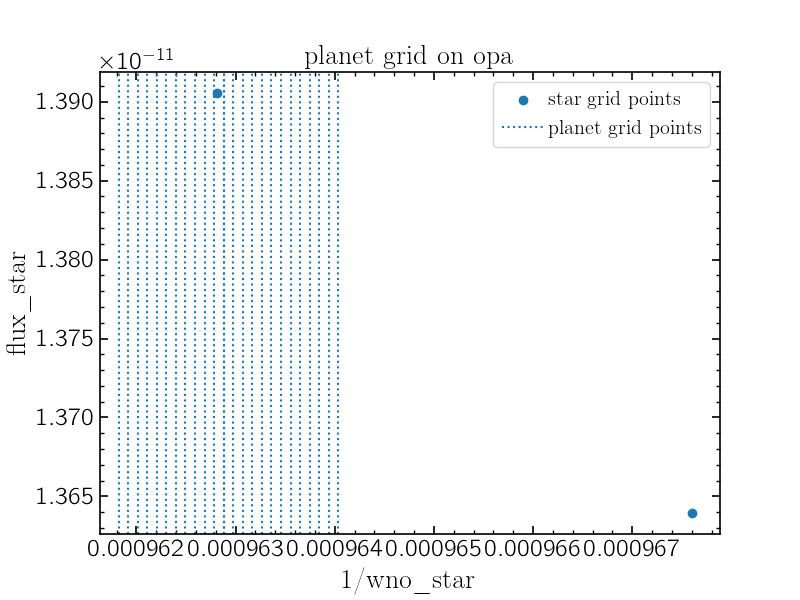

Text(0.5, 1.0, 'planet grid on opa')

In [21]:
%matplotlib notebook
k = 5
j = 3743
plt.scatter([1/wno_star[k-1],1/wno_star[k]],[flux_star[k-1],flux_star[k]], label='star grid points')

for i in range(-12,12):
    plt.axvline(x=1/wno_planet[j+i], ls=':')
plt.axvline(x=1/wno_planet[j], ls=':', label='planet grid points')


# k = 4
# j = 3694
# plt.scatter([1/wno_star[k-1],1/wno_star[k],1/wno_star[k+1]],[flux_star[k-1],flux_star[k],flux_star[k+1]])
# plt.axvline(x=1/wno_planet[j], ls=':', color='orange')
# plt.axvline(x=1/wno_planet[j+1], ls=':',color='orange')
plt.xlabel('1/wno_star')
plt.ylabel('flux_star')
plt.legend(fontsize=15)
plt.title('planet grid on opa')

In [27]:

import picaso.justdoit as jdi
import picaso.justplotit as jpi

##### Load kcoeff opacities:
planet_mh_str = '+100'#'+1.0' #log metallicity
planet_mh = float(planet_mh_str[1:])/100
planet_mh_CtoO_str = '100'#'1.0' # CtoO ratio

ck_db = f'/Volumes/Oy/picaso/reference/kcoeff_2020/sonora_2020_feh{planet_mh_str}_co_{planet_mh_CtoO_str}.data.196'
opacity_ck = jdi.opannection(ck_db=ck_db)

wno_planet = opacity_ck.wno
ind = np.where(1e4/wno_planet <= np.max(wave))
wno_planet = wno_planet[ind]


filename = 'bestfit-JWST-flam-Ang.txt'
star = np.genfromtxt(filename, dtype=(float, float), names='w, f')

flux = star['f']
wave = star['w']

import pysynphot as psyn
sp = psyn.ArraySpectrum(wave, flux, waveunits='um', fluxunits='FLAM')
sp.convert("um")
sp.convert('flam') #ergs/cm2/s/ang
wno_star = 1e4/sp.wave[::-1] #convert to wave number and flip
flux_star = sp.flux[::-1]*1e8 #flip and convert to ergs/cm3/s here to get correct order

<IPython.core.display.Javascript object>


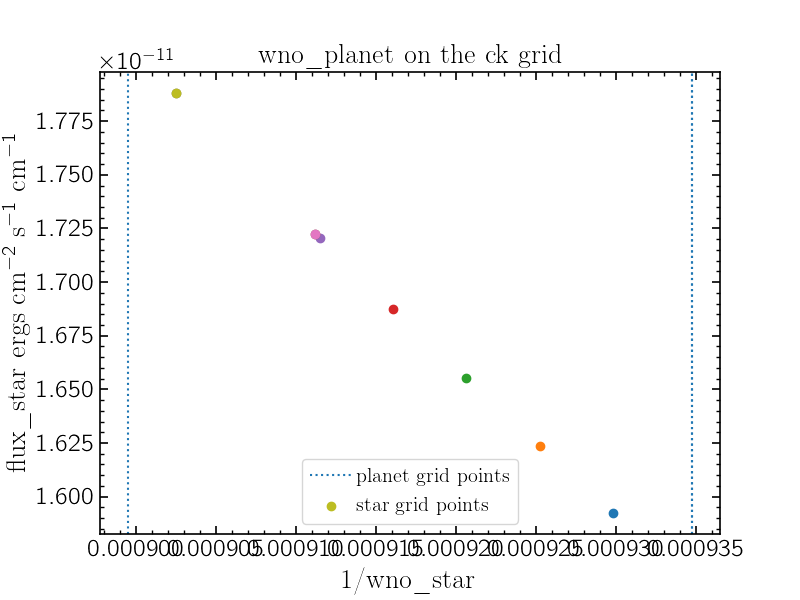

7
8


Text(0.5, 1.0, 'wno_planet on the ck grid')

In [39]:
ks = []
js = []

fine_flux_star = np.zeros(len(wno_planet))

for j in range(len(wno_planet)-1):
    fl = 0

    for k in range(1,len(wno_star)):
        if  (wno_star[k] > wno_planet[j]) and (wno_star[k] < wno_planet[j+1]):
#             print('j',j,'k',k,'yes')
#             print('wno_star[k] > wno_planet[j]',wno_star[k] > wno_planet[j])
#             print('wno_star[k] < wno_planet[j+1]',wno_star[k] < wno_planet[j+1])
#             print()
            ks.append(k)
            js.append(j)
            fl+= 0.5*(flux_star[k-1] +flux_star[k])*abs((1.0/wno_star[k])-(1.0/wno_star[k-1]))
    fine_flux_star[j] = fl
    
%matplotlib notebook
ks = [9,10,11,12,13,14,15,16]
j = 7
fls = []
wnos = []
fluxes = []

for k in ks:
    plt.scatter(1/wno_star[k],flux_star[k])
    fls.append(0.5*(flux_star[k-1] +flux_star[k])*abs((1.0/wno_star[k])-(1.0/wno_star[k-1])))
    wnos.append(wno_star[k])
    fluxes.append(flux_star[k])

for i in range(j,j+2):
    print(i)
    plt.axvline(x=1/wno_planet[i], ls=':')
plt.axvline(x=1/wno_planet[j], ls=':', label='planet grid points')
plt.scatter(1/wno_star[k],flux_star[k], label='star grid points')
plt.legend(fontsize = 15)
plt.xlabel('1/wno_star')
plt.ylabel('flux_star ergs cm$^{-2}$ s$^{-1}$ cm$^{-1}$')
plt.title('wno_planet on the ck grid')


In [40]:
fls, np.sum(fls)

([1.4524967814868138e-16,
  7.402668920381972e-17,
  7.545552116663607e-17,
  7.615919674581839e-17,
  7.766206149209027e-17,
  5.1299321494459e-18,
  6.890247904351285e-20,
  1.5311875800000983e-16],
 6.06870739385545e-16)

In [41]:
[abs((1.0/wno_star[k])-(1.0/wno_star[k-1])) for k in ks]

[9.297999999999924e-06,
 4.604000000000175e-06,
 4.603000000000159e-06,
 4.556999999999977e-06,
 4.557999999999884e-06,
 2.979999999999216e-07,
 4.000000000062981e-09,
 8.723000000000086e-06]

In [42]:
[0.5*(flux_star[k-1] +flux_star[k]) for k in ks]

[1.5621604447051257e-11,
 1.6078776977371178e-11,
 1.639268328625537e-11,
 1.6712573347776778e-11,
 1.7038626917966704e-11,
 1.7214537414252516e-11,
 1.722561976060699e-11,
 1.755345156482957e-11]

## Ok resample WD spectrum onto opacity grid

In [22]:
1e4/wno_planet, wave[::-1]

(array([14.00001212, 13.99861219, 13.9972124 , ...,  0.30006931,
         0.3000393 ,  0.3000093 ]),
 array([9.96919e+00, 9.87049e+00, 9.77276e+00, ..., 4.08000e-03,
        4.04000e-03, 4.00000e-03]))

<IPython.core.display.Javascript object>


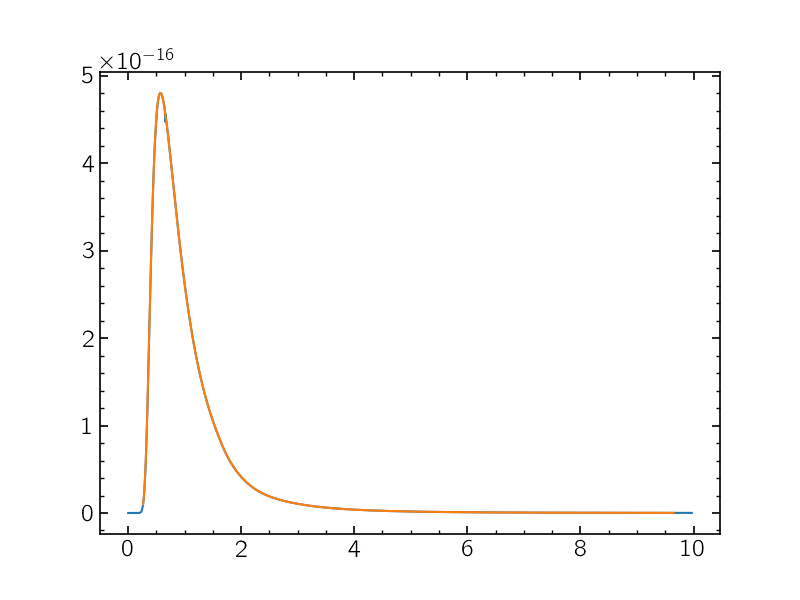

In [23]:
filename = 'bestfit-JWST-flam-Ang.txt'
star = np.genfromtxt(filename, dtype=(float, float), names='w, f')

flux = star['f']
wave = star['w']

wno_planet=opa.wno
wno_planet_ck = opacity_ck.wno

ind = np.where(1e4/wno_planet_ck <= np.max(wave))
from scipy.interpolate import CubicSpline
func = CubicSpline(wave,flux)
flux_resampled = func((1e4/wno_planet_ck)[ind])


pout = pd.DataFrame(data={'lambda (um)':(1e4/wno_planet_ck)[ind],
                         'flam (erg/cm^2/s/A)':flux_resampled})
pout.to_csv('bestfit-JWST-flam-resampled-onto-opa-ck.txt', header=None, index=False, sep=' ')


%matplotlib notebook
plt.plot(wave,flux)
plt.plot((1e4/wno_planet_ck)[ind], flux_resampled)

In [24]:
filename = 'bestfit-JWST-flam-resampled-onto-opa-ck.txt'
#filename = 'blackbody-flam-um.txt'
star = np.genfromtxt(filename, dtype=(float, float), names='w, f')

flux = star['f']
wave = star['w']

import picaso.justdoit as jdi
import picaso.justplotit as jpi

##### Load kcoeff opacities:
planet_mh_str = '+100'#'+1.0' #log metallicity
planet_mh = float(planet_mh_str[1:])/100
planet_mh_CtoO_str = '100'#'1.0' # CtoO ratio

ck_db = f'/Volumes/Oy/picaso/reference/kcoeff_2020/sonora_2020_feh{planet_mh_str}_co_{planet_mh_CtoO_str}.data.196'
opacity_ck = jdi.opannection(ck_db=ck_db) # grab your opacities
#opacity = jdi.opannection()
wd = jdi.inputs(calculation="planet", climate = True) # start a calculation
wd.phase_angle(0)

# wd.star(opacity_ck, temp=4920, metal=None, logg=8.05 ,radius = 0.0121, radius_unit=u.Rsun,
#         semi_major=0.0204, semi_major_unit = u.au, filename=filename, w_unit='um', f_unit='Jy')

# pysynphot FLAM units are ergs/cm2/s/Ang https://pysynphot.readthedocs.io/en/latest/units.html
wd.star(opacity_ck, temp=None, metal=None, logg=None ,radius = 0.0121, radius_unit=u.Rsun,
         semi_major=0.0204, semi_major_unit = u.au, filename=filename, w_unit='um', f_unit='FLAM')

In [25]:
filename = 'bestfit-JWST-flam-resampled-onto-opa.txt'
#filename = 'blackbody-flam-um.txt'
star = np.genfromtxt(filename, dtype=(float, float), names='w, f')

flux = star['f']
wave = star['w']

import picaso.justdoit as jdi
import picaso.justplotit as jpi

##### Load kcoeff opacities:
planet_mh_str = '+100'#'+1.0' #log metallicity
planet_mh = float(planet_mh_str[1:])/100
planet_mh_CtoO_str = '100'#'1.0' # CtoO ratio

ck_db = f'/Volumes/Oy/picaso/reference/kcoeff_2020/sonora_2020_feh{planet_mh_str}_co_{planet_mh_CtoO_str}.data.196'
opacity_ck = jdi.opannection(ck_db=ck_db) # grab your opacities
#opacity = jdi.opannection()
wd = jdi.inputs(calculation="planet", climate = True) # start a calculation
wd.phase_angle(0)

# wd.star(opacity_ck, temp=4920, metal=None, logg=8.05 ,radius = 0.0121, radius_unit=u.Rsun,
#         semi_major=0.0204, semi_major_unit = u.au, filename=filename, w_unit='um', f_unit='Jy')

# pysynphot FLAM units are ergs/cm2/s/Ang https://pysynphot.readthedocs.io/en/latest/units.html
wd.star(opa, temp=None, metal=None, logg=None ,radius = 0.0121, radius_unit=u.Rsun,
         semi_major=0.0204, semi_major_unit = u.au, filename=filename, w_unit='um', f_unit='FLAM')

Warning, 787 of 38431 bins contained negative fluxes; they have been set to zero.


<IPython.core.display.Javascript object>


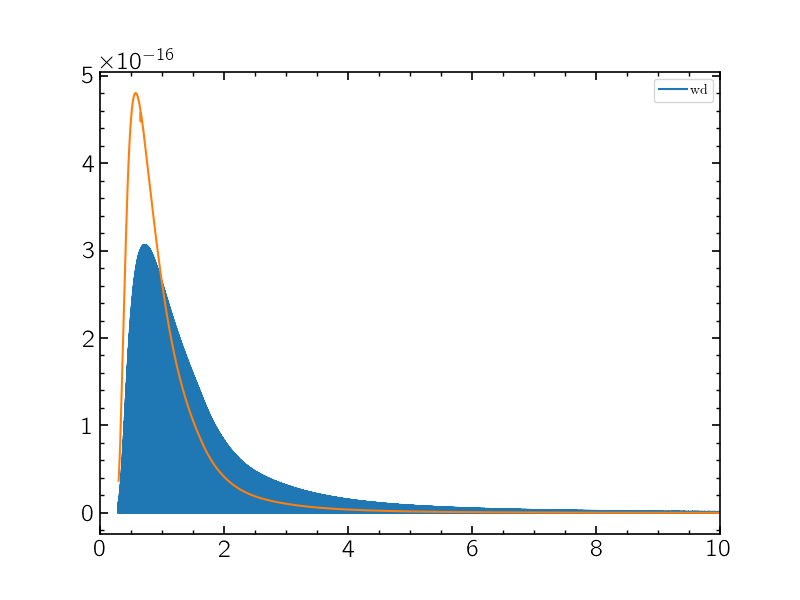

In [26]:
%matplotlib notebook
plt.plot(1e4/wd.inputs['star']['wno'], wd.inputs['star']['flux'], label='wd')
plt.plot(wave,flux)
#plt.gca().set_yscale('log')
plt.xlim(0,10)
plt.legend()

# Trying to get them on the same grid

/Users/loganpearce/anaconda3/envs/py39/lib/python3.9/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in /Volumes/Oy/picaso/reference/grp/redcat/trds/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
/Users/loganpearce/anaconda3/envs/py39/lib/python3.9/site-packages/pysynphot/refs.py:117: UserWarning: No graph or component tables found; functionality will be SEVERELY crippled. No files found for /Volumes/Oy/picaso/reference/grp/redcat/trds/mtab/*_tmg.fits
  warnings.warn('No graph or component tables found; '
/Users/loganpearce/anaconda3/envs/py39/lib/python3.9/site-packages/pysynphot/refs.py:124: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for /Volumes/Oy/picaso/reference/grp/redcat/trds/mtab/*_tmt.fits
  warnings.warn('No thermal tables found, '


<IPython.core.display.Javascript object>


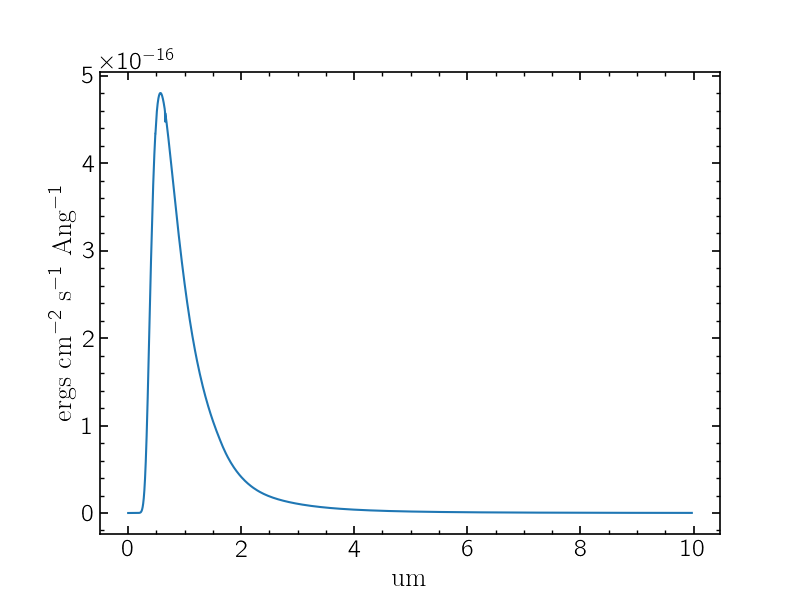

Text(0.5, 0, 'um')

In [1]:
filename = 'bestfit-JWST-flam-Ang.txt'
star = np.genfromtxt(filename, dtype=(float, float), names='w, f')

flux = star['f']
wave = star['w']

import pysynphot as psyn
sp = psyn.ArraySpectrum(wave, flux, waveunits='um', fluxunits='FLAM')
sp.convert("um")
sp.convert('flam') #ergs/cm2/s/ang
wno_star = 1e4/sp.wave[::-1] #convert to wave number and flip
flux_star = sp.flux[::-1]*1e8 #flip and convert to ergs/cm3/s here to get correct order  

### Resample

<IPython.core.display.Javascript object>


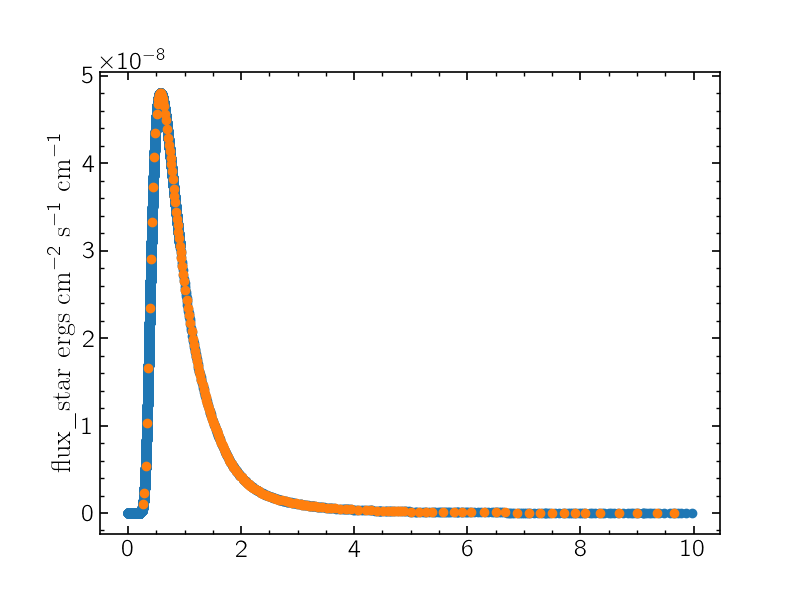

Text(0, 0.5, 'flux_star ergs cm$^{-2}$ s$^{-1}$ cm$^{-1}$')

In [7]:

from scipy.interpolate import CubicSpline
func = CubicSpline(1e4/wno_star[::-1],flux_star[::-1])
flux_resampled = func((1e4/wno_planet[::1]))

%matplotlib notebook
plt.scatter(1e4/wno_star,flux_star)
plt.scatter((1e4/wno_planet),flux_resampled)
plt.ylabel('flux_star ergs cm$^{-2}$ s$^{-1}$ cm$^{-1}$')

In [21]:
ks = []
js = []

fine_flux_star = np.zeros(len(wno_planet))

for j in range(len(wno_planet)-1):
    fl = 0

    for k in range(1,len(wno_planet)):
        if  (wno_planet[k] > wno_planet[j]) and (wno_planet[k] < wno_planet[j+1]):
            print('j',j,'k',k,'yes')
            print('wno_star[k] > wno_planet[j]',wno_planet[k] > wno_planet[j])
            print('wno_star[k] < wno_planet[j+1]',wno_planet[k] < wno_planet[j+1])
            print()
            ks.append(k)
            js.append(j)
            fl+= 0.5*(flux_resampled[k-1] +flux_resampled[k])*abs((1.0/wno_planet[k])-(1.0/wno_planet[k-1]))
    fine_flux_star[j] = fl
    
fine_flux_star

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

<IPython.core.display.Javascript object>


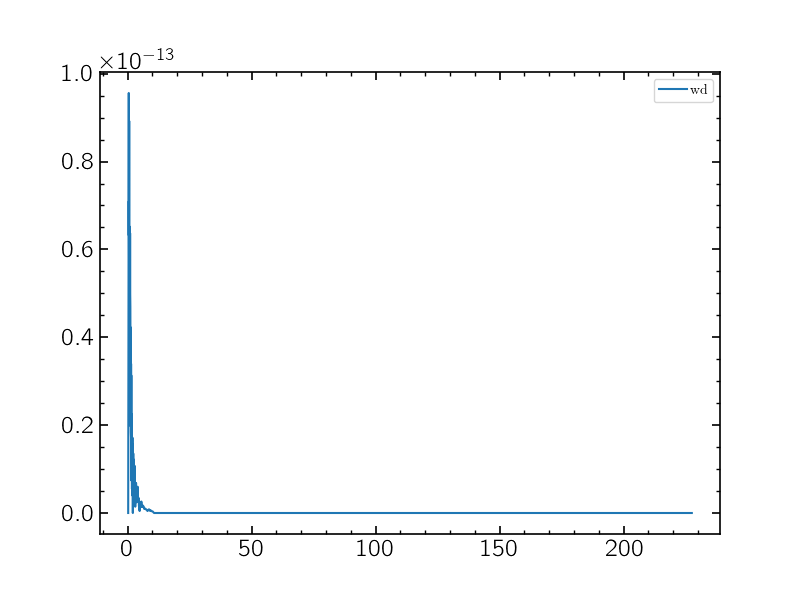

In [8]:
wd = jdi.inputs(calculation="planet", climate = True) # start a calculation
wd.phase_angle(0)

# wd.star(opacity_ck, temp=4920, metal=None, logg=8.05 ,radius = 0.0121, radius_unit=u.Rsun,
#         semi_major=0.0204, semi_major_unit = u.au, filename=filename, w_unit='um', f_unit='Jy')

# pysynphot FLAM units are ergs/cm2/s/Ang https://pysynphot.readthedocs.io/en/latest/units.html
wd.star(opacity_ck, temp=None, metal=None, logg=None ,radius = 0.0121, radius_unit=u.Rsun,
         semi_major=0.0204, semi_major_unit = u.au, filename=filename, w_unit='um', f_unit='FLAM')

%matplotlib notebook
plt.plot(1e4/wd.inputs['star']['wno'], wd.inputs['star']['flux'], label='wd')
plt.legend()

In [ ]:
#elif ((not isinstance(temp, type(None))) & (not isinstance(metal, type(None))) & (not isinstance(logg, type(None)))):
# temp=4920, metal=None, logg=8.05
sp2 = psyn.Icat('phoenix', 6000, 0, 5)
sp2.convert("um")
sp2.convert('flam') 
wno_star2 = 1e4/sp2.wave[::-1] # cm-1 #convert to wave number and flip
flux_star2 = sp2.flux[::-1]*1e8    #flip here and convert to ergs/cm3/s to get correct order


%matplotlib notebook
plt.plot(range(len(wno_planet)),wno_planet, label='wno planet')
plt.plot(range(len(wno_star2)),wno_star2, label='wno star from phoenix')
plt.legend()
plt.xlabel('index')
plt.ylabel('wno')
plt.xlim(0,30000)

## Compare phoenix spec and wd spec on different opacity grids

In [1]:
import picaso.justdoit as jdi
import picaso.justplotit as jpi

planet_mh_str = '+100'#'+1.0' #log metallicity
planet_mh = float(planet_mh_str[1:])/100
planet_mh_CtoO_str = '100'#'1.0' # CtoO ratio

ck_db = f'/Volumes/Oy/picaso/reference/kcoeff_2020/sonora_2020_feh{planet_mh_str}_co_{planet_mh_CtoO_str}.data.196'
opacity_ck = jdi.opannection(ck_db=ck_db)

opa = jdi.opannection(wave_range = [0.3,2])
wno_planet_opa = opa.wno

In [3]:
###### What does a phoenix model do with this?
import pysynphot as psyn
sp = psyn.Icat("phoenix", 3000, 0, 5)
sp.convert("um")
sp.convert('flam') 
wno_star = 1e4/sp.wave[::-1] # cm-1 #convert to wave number and flip
flux_star = sp.flux[::-1]*1e8


Mstar = jdi.inputs(calculation="planet", climate = True) # start a calculation
Mstar.star(opacity_ck, temp=3000, metal=0, logg=5 ,radius = 0.2, radius_unit=u.Rsun,
        semi_major=0.0204, semi_major_unit = u.au, database='phoenix')

Mstar_opa = jdi.inputs(calculation="planet", climate = True) # start a calculation
Mstar_opa.star(opa, temp=3000, metal=0, logg=5 ,radius = 0.2, radius_unit=u.Rsun,
        semi_major=0.0204, semi_major_unit = u.au, database='phoenix')

### wd:
filename = 'bestfit-JWST-flam-Ang.txt'
wdinput = np.genfromtxt(filename, dtype=(float, float), names='w, f')
wdflux = wdinput['f']
wdwave = wdinput['w']

wd = jdi.inputs(calculation="planet", climate = True)
wd.star(opacity_ck, temp=None, metal=None, logg=None ,radius = 0.0121, radius_unit=u.Rsun,
         semi_major=0.0204, semi_major_unit = u.au, filename=filename, w_unit='um', f_unit='FLAM')

wd_opa = jdi.inputs(calculation="planet", climate = True)
wd_opa.star(opa, temp=None, metal=None, logg=None ,radius = 0.0121, radius_unit=u.Rsun,
         semi_major=0.0204, semi_major_unit = u.au, filename=filename, w_unit='um', f_unit='FLAM')


<IPython.core.display.Javascript object>


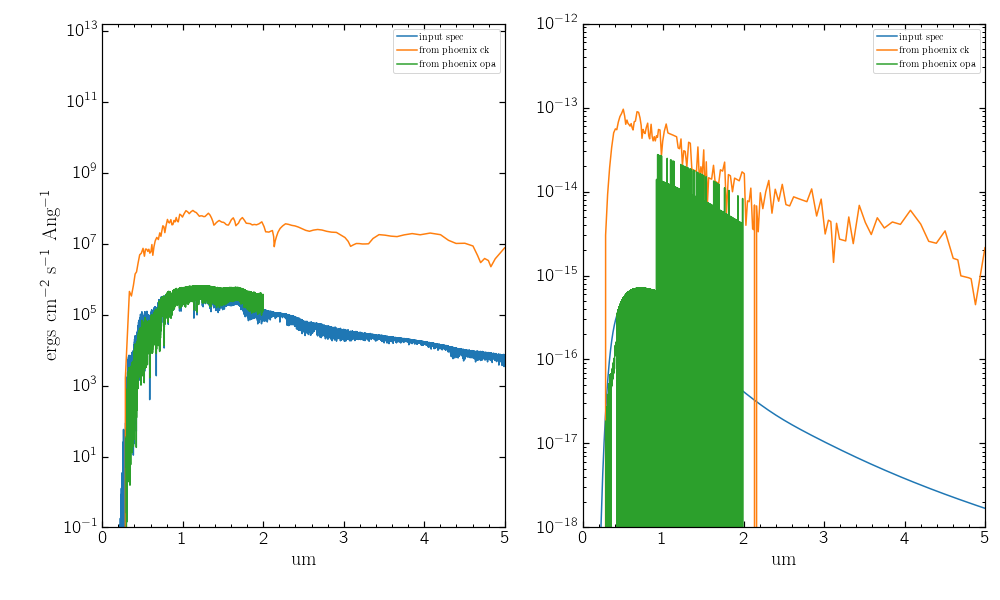

In [7]:
%matplotlib notebook
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.plot(sp.wave,sp.flux,label='input spec')
plt.plot(1e4/Mstar.inputs['star']['wno'], Mstar.inputs['star']['flux'], label='from phoenix ck')
plt.plot(1e4/Mstar_opa.inputs['star']['wno'], Mstar_opa.inputs['star']['flux'], label='from phoenix opa')
plt.gca().set_yscale('log')
plt.ylim(bottom=1e-1)
plt.xlim(right=5, left=0)
plt.legend()
plt.ylabel(r'ergs cm$^{-2}$ s$^{-1}$ Ang$^{-1}$')
plt.xlabel('um')

plt.subplot(122)
plt.plot(wdwave,wdflux,label='input spec')
plt.plot(1e4/wd.inputs['star']['wno'], wd.inputs['star']['flux'], label='from phoenix ck')
plt.plot(1e4/wd_opa.inputs['star']['wno'], wd_opa.inputs['star']['flux'], label='from phoenix opa')
plt.gca().set_yscale('log')
plt.ylim(bottom=1e-18, top=1e-12)
plt.xlim(right=5, left=0)
plt.legend()
plt.xlabel('um')
plt.tight_layout()

<b>Ok actually this is just fine</b>.  You want the enclosed energy within planet grid bin points so the intergral is behaving properly.  We don't want the densely sampled opa grid for climate clas because it is way too long to compute climate, so for the climate portion use the sparse ck grids which is behaving correctly.

If you want to plot the output spectrum correctly on the opa grid, resample to input spectrum onto a new grid that is *more densely* sampled than opa, then put it through a new jdi.input object.

## Scale flux back to stellar surface

In [44]:
distance = [24.75*u.pc, 0.03*u.pc]
radius = 0.0121*u.Rsun
scalefactor = ((radius/distance[0])**2).decompose()
scalefactor

<Quantity 1.21496355e-22>

<IPython.core.display.Javascript object>


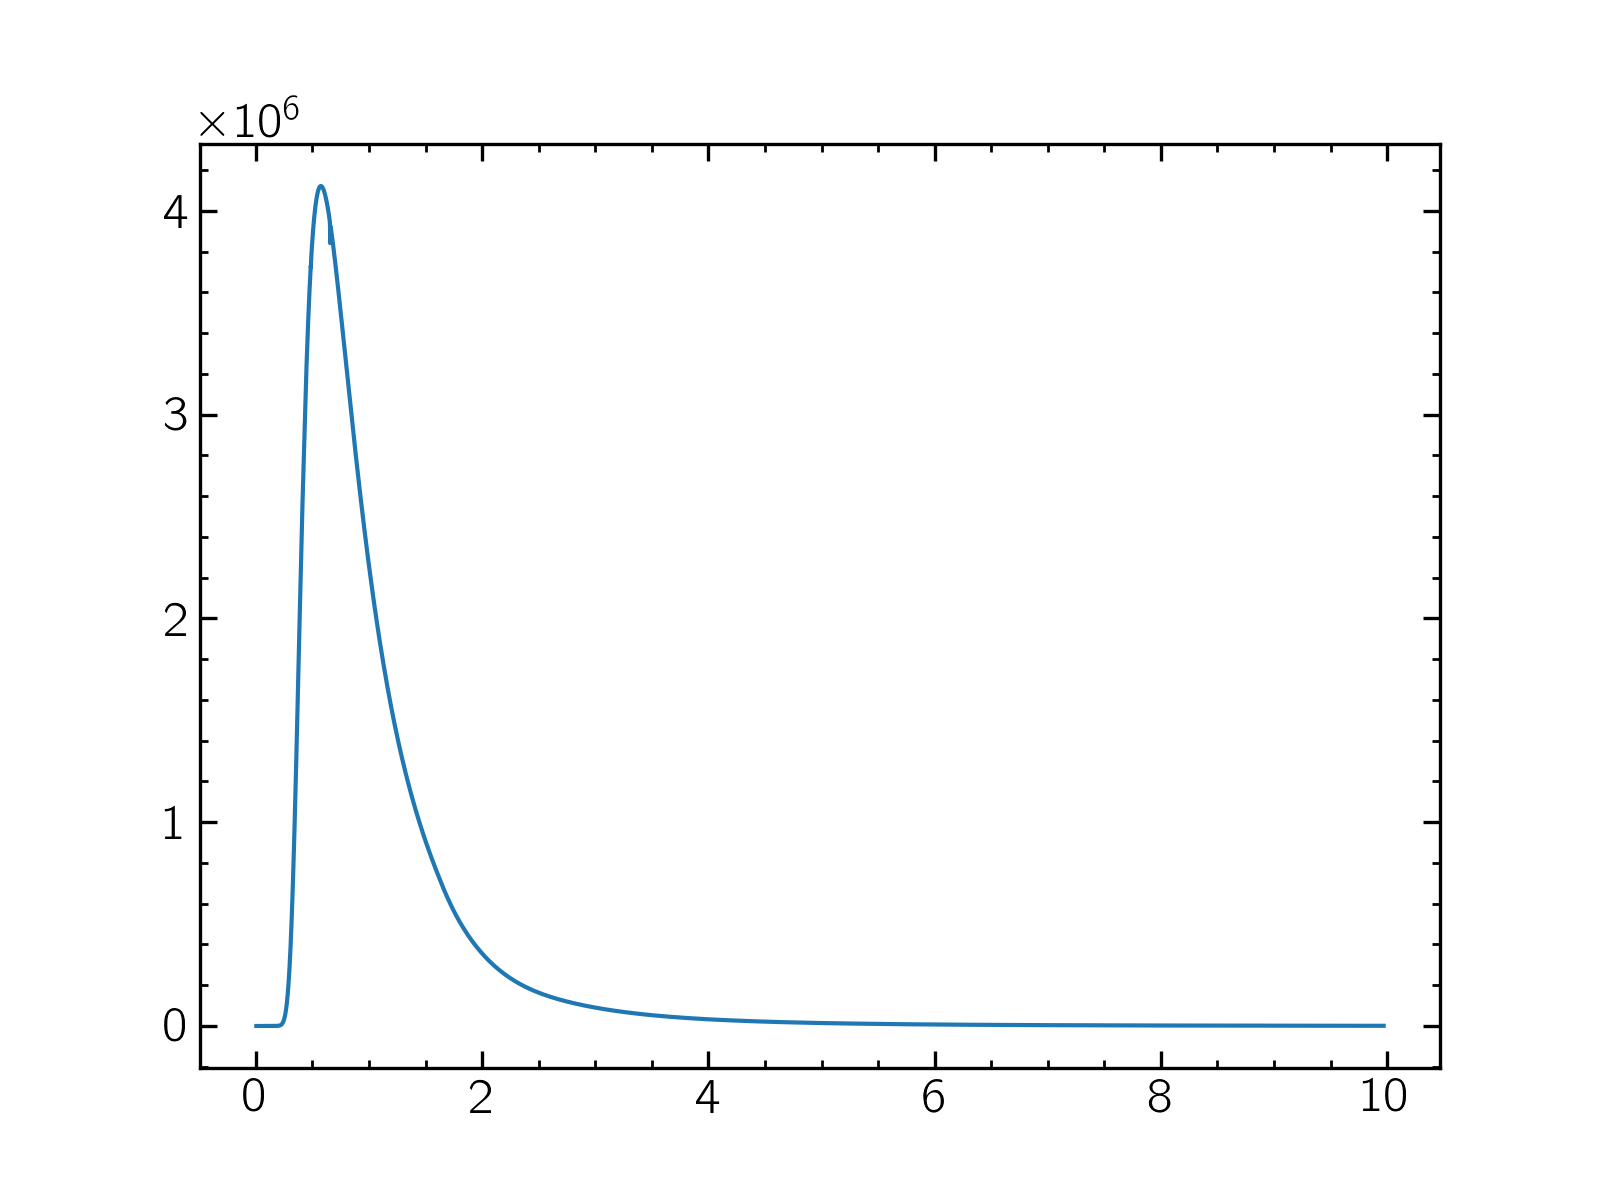

In [17]:
filename = 'bestfit-JWST-flam-Ang-um.txt'
w = pd.read_csv(filename)

w['flam at wd surface (erg/cm^2/s/A)'] = w['flam (erg/cm^2/s/A)']*(scalefactor**-1)
pout = pd.DataFrame(data={'lambda (um)':w['lambda (um)'],
                         'flam at wd surface (erg/cm^2/s/A)':w['flam at wd surface (erg/cm^2/s/A)']})
pout.to_csv('bestfit-JWST-flam-Ang-um-forpicaso.txt', header=None, index=False, sep=' ')
pout.to_csv('bestfit-JWST-flam-Ang-um.txt', index=False)
 
%matplotlib notebook
plt.plot(w['lambda (um)'],w['flam at wd surface (erg/cm^2/s/A)'])